# BiG-SCAPE results analysis

Author: Sandra Godinho Silva \
Creation date: 26/06/2020 \
Version: 0.2 (02-08-2021)

In [1]:
# import standard Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import re
from collections import Counter
import csv

#os.chdir("")

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np

# Data preparation

In [4]:
def LoadMetadata():
    metadata = pd.read_csv("../../3_Annotation/antismash_results/All_info.csv")
    return metadata
metadata = LoadMetadata() 
metadata  = metadata[["Assembly accession", "Genus", "Family", "Origin", "MAG","Completeness","Contamination","Strain_heterogeneity","Quality_score"]]
metadata.head()

,Assembly accession,Genus,Family,Origin,MAG,Completeness,Contamination,Strain_heterogeneity,Quality_score
0,GCA_000016645.1,Flavobacterium,Flavobacteriaceae,Non_marine,False,99.65,0.14,0.0,98.95
1,GCA_000023285.1,Capnocytophaga,Flavobacteriaceae,Non_marine,False,100.00,0.00,0.0,100.00
2,GCA_000023465.1,Zunongwangia,Flavobacteriaceae,Unclassified,False,99.62,0.57,0.0,96.77
3,GCA_000023725.1,Kaistella,Weeksellaceae,Non_marine,False,100.00,0.00,0.0,100.00
4,GCA_000024125.1,Robiginitalea,Flavobacteriaceae,Unclassified,False,99.01,0.11,0.0,98.46


In [5]:
bgcs = pd.read_csv("../../3_Annotation/antismash_results/bgc_antismash_class_counts.csv", index_col=0)
bgcs.head(2)

,GCA_002831645.1,GCA_001971785.1,GCA_002951395.1,GCA_903969135.1,GCA_009664855.1,GCA_001693415.1,GCA_008692195.1,GCA_004341805.1,GCA_003688495.1,GCA_000764795.1,GCA_900186425.1,GCA_000422725.1,GCA_000687935.1,GCA_012931685.1,GCA_002217285.1,GCA_014220885.1,GCA_900141955.1,GCA_002217435.1,GCA_002954645.1,GCA_001404985.1,GCA_003054025.1,GCA_003201775.1,GCA_001439215.1,GCA_007993795.1,GCA_006491645.1,GCA_014305215.1,GCA_004328055.1,GCA_000971735.2,GCA_004762155.1,GCA_000518525.1,GCA_004122105.1,GCA_002482945.1,GCA_000829375.1,GCA_004016525.1,GCA_000422365.1,GCA_014219395.1,GCA_003860585.1,GCA_001686925.1,GCA_003057865.1,GCA_002899825.2,GCA_008017345.1,GCA_900610305.1,GCA_009993865.1,GCA_002379725.1,GCA_900111025.1,GCA_000744105.1,GCA_900115115.1,GCA_900130035.1,GCA_004349155.1,GCA_002422665.1,GCA_900141785.1,GCA_002217315.1,GCA_002727005.1,GCA_002375245.1,GCA_000735135.1,GCA_013372885.1,GCA_004363695.1,GCA_002862805.1,GCA_900106075.1,GCA_000520955.1,GCA_003232155.1,GCA_001544435.1,GCA_900182675.1,GCA_900299475.1,GCA_012273615.1,GCA_002256385.1,GCA_002022045.1,GCA_006088815.1,GCA_002999135.1,GCA_002302595.1,GCA_003344925.1,GCA_000224085.1,GCA_007990835.1,GCA_011612125.1,GCA_013001965.1,GCA_900610255.1,GCA_000971785.2,GCA_900107365.1,GCA_003970335.1,GCA_011058315.1,GCA_003070725.1,GCA_013394595.1,GCA_004362665.1,GCA_900141855.1,GCA_002835665.1,GCA_900538225.1,GCA_002171295.2,GCA_002023335.1,GCA_000626715.1,GCA_004959765.1,GCA_000423005.1,GCA_013002225.1,GCA_900104785.1,GCA_002439165.1,GCA_001684955.1,GCA_002909255.1,GCA_014220525.1,GCA_009994385.1,GCA_002711455.1,GCA_002862705.1,GCA_004369705.1,GCA_002700405.1,GCA_002728045.1,GCA_000379185.1,GCA_014220725.1,GCA_002728855.1,GCA_003971235.1,GCA_010645065.1,GCA_002471825.1,GCA_003318185.1,GCA_008370685.1,GCA_009725985.1,GCA_001510875.1,GCA_000769815.1,GCA_900142635.1,GCA_009495755.1,GCA_001439665.1,GCA_002721175.1,GCA_004293805.1,GCA_900101925.1,GCA_003581615.1,GCA_003634615.1,GCA_900446845.1,GCA_002693085.1,GCA_013042425.1,GCA_001761325.1,GCA_013294075.1,GCA_013043005.1,GCA_011305415.1,GCA_002429865.1,GCA_900453765.1,GCA_013214815.1,GCA_014220675.1,GCA_900447295.1,GCA_002713705.1,GCA_900447195.1,GCA_002691265.1,GCA_000982575.1,GCA_000757385.1,GCA_900239505.1,GCA_002453015.1,GCA_000799195.1,GCA_003487925.1,GCA_000495995.1,GCA_009938095.1,GCA_002713495.1,GCA_003968825.1,GCA_900108525.1,GCA_009827855.1,GCA_010500845.1,GCA_002453895.1,GCA_000282055.1,GCA_000799325.1,GCA_002364245.1,GCA_002831685.1,GCA_900186815.1,GCA_014243345.1,GCA_007097385.1,GCA_009360735.1,GCA_000799235.1,GCA_013373485.1,GCA_002312885.1,GCA_003970375.1,GCA_009498295.1,GCA_009659705.1,GCA_010906935.1,GCA_001686935.1,GCA_002746415.1,GCA_008501705.1,GCA_008017825.1,GCA_003254565.1,GCA_003525065.1,GCA_900108395.1,GCA_004349135.1,GCA_002366675.1,GCA_002072105.2,GCA_002401215.1,GCA_003315315.1,GCA_014220605.1,GCA_014050215.1,GCA_003014895.1,GCA_007474535.1,GCA_008124555.1,GCA_009753805.1,GCA_014219825.1,GCA_902705525.1,GCA_002899875.1,GCA_002292245.1,GCA_003058265.1,GCA_003852805.1,GCA_002401385.1,GCA_007474545.1,GCA_009797885.1,GCA_900108365.1,GCA_900239305.1,GCA_002315415.1,GCA_002375695.1,GCA_003410315.1,GCA_008017835.1,GCA_009886545.1,GCA_002530675.1,GCA_900111495.1,GCA_002433745.1,GCA_014220055.1,GCA_003055625.1,GCA_000243275.1,GCA_003293825.1,GCA_002785365.1,GCA_000496015.1,GCA_002364215.1,GCA_900239455.1,GCA_900113975.1,GCA_007997235.1,GCA_000060345.1,GCA_004684835.1,GCA_002723075.1,GCA_014239615.1,GCA_001889005.1,GCA_002120225.1,GCA_002483315.1,GCA_000153165.2,GCA_002025665.1,GCA_002631855.1,GCA_007050985.1,GCA_900299525.1,GCA_002023465.1,GCA_000744275.1,GCA_009994285.1,GCA_002708445.1,GCA_009993745.1,GCA_002311535.1,GCA_003208535.1,GCA_002354835.1,GCA_014218945.1,GCA_900109345.1,GCA_002484335.1,GCA_003001855.1,GCA_011392075.1,GCA_003097655.1,GCA_002722255.1,GCA_000382425.1,GCA_003298875.1,GCA_002514735.1,GCA_008629655.1,GCA_002399805.1,GCA_007997385.1,GCA_006778065.1,GCA_014219625.1,GCA_014220005.1,GCA_900105145.1

In [6]:
bgc_t = bgcs.T
bgc_t.head(2)

,T3PKS,"terpene,bacteriocin",terpene,LAP,bacteriocin,siderophore,"hglE-KS,T1PKS",microviridin,"resorcinol,arylpolyene",NRPS-like,lanthipeptide,betalactone,"arylpolyene,resorcinol",arylpolyene,"NRPS,T1PKS","T3PKS,betalactone","T3PKS,arylpolyene","T3PKS,NRPS,T1PKS",ladderane,"transAT-PKS-like,transAT-PKS","arylpolyene,T3PKS",NRPS,"NRPS,T1PKS,T3PKS","ladderane,terpene","hglE-KS,T1PKS,lanthipeptide","NRPS-like,T3PKS","betalactone,T3PKS","T1PKS,NRPS","bacteriocin,lanthipeptide","T1PKS,hglE-KS",transAT-PKS-like,"transAT-PKS,PKS-like",resorcinol,thiopeptide,"NRPS,ladderane","NRPS-like,terpene","transAT-PKS,PKS-like,transAT-PKS-like","transAT-PKS,NRPS,PKS-like",linaridin,"NRPS,terpene","transAT-PKS,transAT-PKS-like","T3PKS,NRPS","arylpolyene,resorcinol,T3PKS","thiopeptide,LAP",indole,lassopeptide,"PUFA,T1PKS,hglE-KS",T1PKS,"terpene,NRPS-like,betalactone","NRPS,indole","NRPS-like,bacteriocin","NRPS-like,T1PKS","NRPS-like,betalactone","PKS-like,transAT-PKS,NRPS","terpene,lanthipeptide","proteusin,LAP,bacteriocin","NRPS,hglE-KS,T1PKS","hglE-KS,T1PKS,NRPS,betalactone","lanthipeptide,terpene","LAP,proteusin,bacteriocin","NRPS,LAP,proteusin","T3PKS,terpene","ladderane,transAT-PKS,PKS-like","siderophore,bacteriocin","terpene,bacteriocin,siderophore","NRPS,T1PKS,lanthipeptide","NRPS,T3PKS","transAT-PKS-like,transAT-PKS,PKS-like","bacteriocin,arylpolyene,resorcinol","T1PKS,hglE-KS,terpene","terpene,T1PKS,hglE-KS","terpene,arylpolyene,resorcinol","T1PKS,NRPS-like","NRPS,T1PKS,betalactone","transAT-PKS-like,transAT-PKS,PKS-like,ladderane","arylpolyene,bacteriocin","NRPS-like,siderophore",transAT-PKS,"T3PKS,hglE-KS,siderophore,NRPS,T1PKS","NRPS-like,lanthipeptide","NRPS,lanthipeptide","arylpolyene,resorcinol,NRPS",hglE-KS,"PUFA,T1PKS",hserlactone,"acyl_amino_acids,bacteriocin","NRPS,siderophore","betalactone,NRPS-like","bacteriocin,siderophore","NRPS,T1PKS,bacteriocin",CDPS,"transAT-PKS,NRPS","T1PKS,hglE-KS,NRPS,siderophore","T3PKS,NRPS-like","NRPS,transAT-PKS","ladderane,NRPS","transAT-PKS,transAT-PKS-like,NRPS-like,PKS-like,T3PKS","terpene,ladderane","lanthipeptide,siderophore","NRPS,T1PKS,siderophore","terpene,arylpolyene","lanthipeptide,bacteriocin","proteusin,LAP","terpene,hglE-KS,PUFA,T1PKS","LAP,proteusin","hglE-KS,T1PKS,terpene","T3PKS,resorcinol","bacteriocin,acyl_amino_acids","NRPS,betalactone","NRPS-like,NRPS,siderophore","terpene,T3PKS",acyl_amino_acids,"hglE-KS,PUFA,T1PKS",other,"lanthipeptide,T1PKS,hglE-KS",nucleoside,"terpene,hglE-KS,T1PKS","terpene,siderophore","transAT-PKS-like,transAT-PKS,PKS-like,NRPS,T1PKS","T3PKS,arylpolyene,resorcinol","transAT-PKS,bacteriocin","NRPS,bacteriocin","NRPS,T1PKS,siderophore,hglE-KS,T3PKS","arylpolyene,resorcinol,bacteriocin","NRPS-like,hglE-KS,T1PKS","arylpolyene,lanthipeptide,resorcinol","NRPS,proteusin,LAP","siderophore,terpene","lanthipeptide,T3PKS,bacteriocin","hglE-KS,terpene,T1PKS","terpene,betalactone","ladderane,transAT-PKS,PKS-like,transAT-PKS-like","transAT-PKS,NRPS-like",cyanobactin,"siderophore,NRPS","lanthipeptide,hglE-KS,T1PKS","transAT-PKS-like,transAT-PKS,T3PKS,PKS-like,NRPS-like","hglE-KS,T1PKS,PUFA","transAT-PKS,PKS-like,ladderane"
GCA_002831645.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GCA_001971785.1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
merge = pd.merge(bgc_t, metadata, how="left", left_index=True, right_on="Assembly accession")
merge.set_index("Assembly accession", inplace=True)
merge3 = merge.copy()
merge.head(2)

,T3PKS,"terpene,bacteriocin",terpene,LAP,bacteriocin,siderophore,"hglE-KS,T1PKS",microviridin,"resorcinol,arylpolyene",NRPS-like,lanthipeptide,betalactone,"arylpolyene,resorcinol",arylpolyene,"NRPS,T1PKS","T3PKS,betalactone","T3PKS,arylpolyene","T3PKS,NRPS,T1PKS",ladderane,"transAT-PKS-like,transAT-PKS","arylpolyene,T3PKS",NRPS,"NRPS,T1PKS,T3PKS","ladderane,terpene","hglE-KS,T1PKS,lanthipeptide","NRPS-like,T3PKS","betalactone,T3PKS","T1PKS,NRPS","bacteriocin,lanthipeptide","T1PKS,hglE-KS",transAT-PKS-like,"transAT-PKS,PKS-like",resorcinol,thiopeptide,"NRPS,ladderane","NRPS-like,terpene","transAT-PKS,PKS-like,transAT-PKS-like","transAT-PKS,NRPS,PKS-like",linaridin,"NRPS,terpene","transAT-PKS,transAT-PKS-like","T3PKS,NRPS","arylpolyene,resorcinol,T3PKS","thiopeptide,LAP",indole,lassopeptide,"PUFA,T1PKS,hglE-KS",T1PKS,"terpene,NRPS-like,betalactone","NRPS,indole","NRPS-like,bacteriocin","NRPS-like,T1PKS","NRPS-like,betalactone","PKS-like,transAT-PKS,NRPS","terpene,lanthipeptide","proteusin,LAP,bacteriocin","NRPS,hglE-KS,T1PKS","hglE-KS,T1PKS,NRPS,betalactone","lanthipeptide,terpene","LAP,proteusin,bacteriocin","NRPS,LAP,proteusin","T3PKS,terpene","ladderane,transAT-PKS,PKS-like","siderophore,bacteriocin","terpene,bacteriocin,siderophore","NRPS,T1PKS,lanthipeptide","NRPS,T3PKS","transAT-PKS-like,transAT-PKS,PKS-like","bacteriocin,arylpolyene,resorcinol","T1PKS,hglE-KS,terpene","terpene,T1PKS,hglE-KS","terpene,arylpolyene,resorcinol","T1PKS,NRPS-like","NRPS,T1PKS,betalactone","transAT-PKS-like,transAT-PKS,PKS-like,ladderane","arylpolyene,bacteriocin","NRPS-like,siderophore",transAT-PKS,"T3PKS,hglE-KS,siderophore,NRPS,T1PKS","NRPS-like,lanthipeptide","NRPS,lanthipeptide","arylpolyene,resorcinol,NRPS",hglE-KS,"PUFA,T1PKS",hserlactone,"acyl_amino_acids,bacteriocin","NRPS,siderophore","betalactone,NRPS-like","bacteriocin,siderophore","NRPS,T1PKS,bacteriocin",CDPS,"transAT-PKS,NRPS","T1PKS,hglE-KS,NRPS,siderophore","T3PKS,NRPS-like","NRPS,transAT-PKS","ladderane,NRPS","transAT-PKS,transAT-PKS-like,NRPS-like,PKS-like,T3PKS","terpene,ladderane","lanthipeptide,siderophore","NRPS,T1PKS,siderophore","terpene,arylpolyene","lanthipeptide,bacteriocin","proteusin,LAP","terpene,hglE-KS,PUFA,T1PKS","LAP,proteusin","hglE-KS,T1PKS,terpene","T3PKS,resorcinol","bacteriocin,acyl_amino_acids","NRPS,betalactone","NRPS-like,NRPS,siderophore","terpene,T3PKS",acyl_amino_acids,"hglE-KS,PUFA,T1PKS",other,"lanthipeptide,T1PKS,hglE-KS",nucleoside,"terpene,hglE-KS,T1PKS","terpene,siderophore","transAT-PKS-like,transAT-PKS,PKS-like,NRPS,T1PKS","T3PKS,arylpolyene,resorcinol","transAT-PKS,bacteriocin","NRPS,bacteriocin","NRPS,T1PKS,siderophore,hglE-KS,T3PKS","arylpolyene,resorcinol,bacteriocin","NRPS-like,hglE-KS,T1PKS","arylpolyene,lanthipeptide,resorcinol","NRPS,proteusin,LAP","siderophore,terpene","lanthipeptide,T3PKS,bacteriocin","hglE-KS,terpene,T1PKS","terpene,betalactone","ladderane,transAT-PKS,PKS-like,transAT-PKS-like","transAT-PKS,NRPS-like",cyanobactin,"siderophore,NRPS","lanthipeptide,hglE-KS,T1PKS","transAT-PKS-like,transAT-PKS,T3PKS,PKS-like,NRPS-like","hglE-KS,T1PKS,PUFA","transAT-PKS,PKS-like,ladderane",Genus,Family,Origin,MAG,Completeness,Contamination,Strain_heterogeneity,Quality_score
Assembly accession,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GCA_002831645.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Olleya,Flavobacteriaceae,Marine,False,99.67,0.33,0.0,98.02
GCA_001971785.1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [8]:
merge3_reduced = merge3.drop(columns=["Genus", "Family", "Origin", "MAG","Completeness","Contamination","Strain_heterogeneity","Quality_score"])
merge_include = merge3[["Genus", "Family", "Origin"]]
merge3_reduced[ merge3_reduced >0] =1
merge4 = pd.merge(merge3_reduced, merge_include, how="left", left_index=True, right_index=True)
merge4.head()
merge4.to_csv("BGC_counts_PA.csv")

In [9]:
merge2 = merge.copy()
merge2["SUM"] = merge2.apply(pd.to_numeric, errors='ignore').sum(axis=1)
numeric_cols = merge2.select_dtypes(exclude=["object"]).columns.to_list()
numeric_cols.remove("SUM")
merge[numeric_cols] = merge2[numeric_cols].div(merge2["SUM"], axis=0)#.multiply(1000)
merge2.drop(columns="SUM", inplace=True)
merge2.head()
merge2.to_csv("BGC_counts_mean.csv")

# BGC all info

In [10]:
bgc_all_info = pd.read_csv("../../3_Annotation/antismash_results/all_BGC_info.csv")
bgc_all_info["name"]= bgc_all_info["Correct_name"].str.split("_", expand=True)[2]
bgc_all_info['BGC_name'] = bgc_all_info[['Genome', 'name']].agg('_'.join, axis=1)
bgc_all_info = bgc_all_info.drop(columns=["Correct_name","name", "Genome"])
bgc_all_info.head()

,Region_Type,antiSMASH_classif,new_classif,From,To,Size(bp),Most_similar_known_ cluster,Most_similar_classif,Similarity,BGC_name
0,Region&nbsp1,T3PKS,PKSIII,582350.0,623402,41052.0,NaN,NaN,NaN,GCA_002831645.1_contig1.region001
1,Region&nbsp2,"terpene,bacteriocin",Others,1879449.0,1909353,29904.0,NaN,NaN,NaN,GCA_002831645.1_contig1.region002
2,Region&nbsp3,terpene,terpene,2137564.0,2160010,22446.0,carotenoid,Terpene,28%,GCA_002831645.1_contig1.region003
3,Region&nbsp4,LAP,RiPPs,2236187.0,2258361,22174.0,NaN,NaN,NaN,GCA_002831645.1_contig1.region004
4,Region&nbsp1,bacteriocin,RiPPs,1547629.0,1559785,12156.0,NaN,NaN,NaN,GCA_001971785.1_contig1.region001


In [11]:
len(bgc_all_info)

9330

# Clans and families

In [12]:
bigscape = pd.read_csv("../../3_Annotation/antismash_results/Clans_and_families.csv")
bigscape.head(2)

,Genome,BGC_full,Class,BiG-SCAPE class,Product Prediction,Clan,Family,Pfam_vector,Pfam_vector_length,Pfam_descriptor
0,GCA_001975985.1,GCA_001975985.1_contig06.region001,NRPS,NRPS,NRPS,4935,1639,['PF00378.20 PF04023.14 PF02742.15 PF01325.19 ...,27,AMP-binding;AMP-binding_C;PP-binding;Condensation
1,GCA_000154725.1,GCA_000154725.1_contig1.region002,NRPS,NRPS,NRPS-like,4935,1850,['PF00082.22 PF04542.14 PF14559.6 PF05147.13 P...,13,Coa1;T2SSE;T2SSF;T2SSF;DDE_Tnp_1_3;DUF1015;Pep...


In [13]:
bigscape_extended = pd.merge(bigscape, bgc_all_info, how="left", left_on="BGC_full", right_on="BGC_name")

bigscape_extended = pd.merge(bigscape_extended, metadata, how="left", left_on="Genome", right_on="Assembly accession")
bigscape_extended.rename(columns={"Family_x":"Family_bgc","Family_y":"Family_tax"}, inplace=True)

bigscape_extended["Similarity"] = bigscape_extended["Similarity"].str.replace("%","").astype("float").fillna(0)
bigscape_extended["Known_cluster"] =[False if pd.isnull(x)   else True for x in bigscape_extended["Most_similar_known_ cluster"]]
bigscape_extended["Known_cluster"] =[False if x < 60  else True for x in bigscape_extended["Similarity"]]

bigscape_extended.head(2)

,Genome,BGC_full,Class,BiG-SCAPE class,Product Prediction,Clan,Family_bgc,Pfam_vector,Pfam_vector_length,Pfam_descriptor,Region_Type,antiSMASH_classif,new_classif,From,To,Size(bp),Most_similar_known_ cluster,Most_similar_classif,Similarity,BGC_name,Assembly accession,Genus,Family_tax,Origin,MAG,Completeness,Contamination,Strain_heterogeneity,Quality_score,Known_cluster
0,GCA_001975985.1,GCA_001975985.1_contig06.region001,NRPS,NRPS,NRPS,4935,1639,['PF00378.20 PF04023.14 PF02742.15 PF01325.19 ...,27,AMP-binding;AMP-binding_C;PP-binding;Condensation,Region&nbsp6.1,NRPS,NRPS,27019.0,76588.0,49569.0,monobactam,NRP,100.0,GCA_001975985.1_contig06.region001,GCA_001975985.1,Flavobacterium,Flavobacteriaceae,Non_marine,False,99.65,0.05,0.0,99.40,True
1,GCA_000154725.1,GCA_000154725.1_contig1.region002,NRPS,NRPS,NRPS-like,4935,1850,['PF00082.22 PF04542.14 PF14559.6 PF05147.13 P...,13,Coa1;T2SSE;T2SSF;T2SSF;DDE_Tnp_1_3;DUF1015;Pep...,Region&nbsp2,NRPS-like,NRPS,1061786.0,1102756.0,40970.0,NaN,NaN,0.0,GCA_000154725.1_contig1.region002,GCA_000154725.1,Kordia,Flavobacteriaceae,Unclassified,False,99.48,0.61,0.0,96.43,False


In [14]:
#bigscape_extended.to_csv("../../3_Annotation/antismash_results/Clans_and_families_extended.csv", index=False)

In [15]:
t2 = bigscape_extended.groupby(["Clan","Family_tax"])["Family_tax"].count().to_frame().rename(columns={"Family_tax":"Counts"})
t2 = pd.pivot_table(t2, values='Counts', index=['Clan'],columns=['Family_tax'], aggfunc=np.sum, fill_value=0).reset_index()#.set_index("X")
t2.columns.name=''
t2.head()

,Clan,Flavobacteriaceae,Weeksellaceae
0,1848,1044,230
1,1982,13,0
2,2447,0,5
3,2581,7,0
4,2584,12,0


In [16]:
uniq = bigscape_extended.groupby(["Clan"])["Genus"].describe().sort_values(by="count", ascending=False)
uniq.rename(columns={"unique":"Number of different genera", "top":"Most common genus", "freq":"Freq of most common genus"}, inplace=True)
uniq.head()

,count,Number of different genera,Most common genus,Freq of most common genus
Clan,,,,
6097,2483,154,Flavobacterium,601
4095,1602,107,Flavobacterium,309
1848,1274,88,Flavobacterium,379
9045,860,60,Chryseobacterium,273
4935,835,47,Flavobacterium,252


In [17]:
t = bigscape_extended.groupby(["Clan","Genus"])["Genus"].count().to_frame()
t.rename(columns={"Genus":"Counts"}, inplace=True)#.T#.reset_index()#.sort_values(by="Clan", ascending=False)
t = pd.pivot_table(t, values='Counts', index=['Clan'],columns=['Genus'], aggfunc=np.sum, fill_value=0).T#reset_index()
t['Total'] = t.sum(axis=1)#

t = t.sort_values(by ="Total", ascending=False)
t = t.iloc[:26,:]

#t = t.head(26)

t = t.T.reset_index()
t = t[["Clan",'Flavobacterium', 'Chryseobacterium', 'Elizabethkingia', 'Aquimarina', 'Tenacibaculum', 'Maribacter', 'Capnocytophaga', 'Muricauda', 
       'Winogradskyella', 'Leeuwenhoekiella', 'Aequorivita', 'Polaribacter', 'Arenibacter', 'Kaistella','Empedobacter',"Kordia","Myroides" ]]
t["Total genus described"]= t.sum(axis=1)#
t.columns.name=''

t.head()

,Clan,Flavobacterium,Chryseobacterium,Elizabethkingia,Aquimarina,Tenacibaculum,Maribacter,Capnocytophaga,Muricauda,Winogradskyella,Leeuwenhoekiella,Aequorivita,Polaribacter,Arenibacter,Kaistella,Empedobacter,Kordia,Myroides,Total genus described
0,1848,379,175,0,90,14,50,0,21,44,8,38,47,5,31,0,10,2,914
1,1982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,13
2,2447,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
3,2581,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2584,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
t.columns.to_list()

['Clan',
 'Flavobacterium',
 'Chryseobacterium',
 'Elizabethkingia',
 'Aquimarina',
 'Tenacibaculum',
 'Maribacter',
 'Capnocytophaga',
 'Muricauda',
 'Winogradskyella',
 'Leeuwenhoekiella',
 'Aequorivita',
 'Polaribacter',
 'Arenibacter',
 'Kaistella',
 'Empedobacter',
 'Kordia',
 'Myroides',
 'Total genus described']

### Length of dataset

In [19]:
len(bigscape)

10234

In [20]:
# there are repeated BGCs!
len(bigscape[~bigscape["BGC_full"].duplicated()])

9314

In [21]:
#bigscape[bigscape["BGC_full"].duplicated(keep=False)].sort_values(by="BGC_full").to_csv("Duplicates.csv")

### Description of Clans

In [22]:
#bigscape_extended.groupby("Clan").count()

In [23]:
df = bigscape_extended.groupby("Clan").count()["Genome"].reset_index()
df.columns = ["Clan", "Nr_BGCs_per_Clan"]
df = df.sort_values(by="Nr_BGCs_per_Clan", ascending=False)
df.head()

,Clan,Nr_BGCs_per_Clan
49,6097,2485
21,4095,1602
0,1848,1274
78,9045,860
37,4935,835


In [24]:
df1 = bigscape_extended.groupby("Clan").sum()["Known_cluster"].reset_index()
df1.columns = ["Clan", "Nr_known_clusters"]
df1 = df1.sort_values(by="Nr_known_clusters", ascending=False)
df1.head()

,Clan,Nr_known_clusters
21,4095,360
82,9673,274
54,6470,136
6,2750,76
65,7507,46


In [25]:
df2 = bigscape_extended.groupby("Clan")["BiG-SCAPE class"].value_counts().to_frame('counts').reset_index()#.sum()#.sort_values(ascending=False)
df2 = pd.pivot_table(df2, values='counts', index=['Clan'],columns=['BiG-SCAPE class'], aggfunc=np.sum, fill_value=0)
df2.head()

BiG-SCAPE class,NRPS,Others,PKS-NRP_Hybrids,PKSother,RiPPs,Terpene
Clan,,,,,,
1848,0,252,172,850,0,0
1982,0,13,0,0,0,0
2447,0,0,0,0,5,0
2581,0,0,0,0,0,7
2584,0,0,0,0,0,12


In [26]:
 bigscape_extended[bigscape_extended["Known_cluster"]==True].groupby("Clan")["Most_similar_known_ cluster"].value_counts().sort_values(ascending=False).to_frame('counts').reset_index()#.sum()#.sort_values(ascending=False)


,Clan,Most_similar_known_ cluster,counts
0,9673,flexirubin,274
1,4095,flexirubin,236
2,6470,flexirubin,136
3,4095,bisucaberin B,120
4,2750,flexirubin,76
5,7507,flexirubin,46
6,6133,flexirubin,31
7,3967,bisucaberin B,22
8,4598,flexirubin,20
9,4560,flexirubin,19


In [27]:
df3 = bigscape_extended[bigscape_extended["Known_cluster"]==True].groupby("Clan")["Most_similar_known_ cluster"].value_counts().sort_values(ascending=False).to_frame('counts').reset_index()#.sum()#.sort_values(ascending=False)
df3 = df3.fillna(0)
df3 = pd.pivot_table(df3, values='counts', index=['Clan'],columns=['Most_similar_known_ cluster'], aggfunc=np.sum, fill_value=0)
df3.columns.name=''
df4 = df3.T
df4['Total'] = df4.sum(axis=1)#
df4 =df4.sort_values(by ="Total", ascending=False)
df4 = df4.head(20)
#
df4 = df4.T
df4.columns.name=''
df5 = df4.fillna(0)
#df4 = df4[["carotenoid","flexirubin","putrebactin / avaroferrin","bisucaberin B","colanic acid","bacillomycin D","polysaccharide B","pinensins","ET-743"]]
df4["Total compounds described"]= df4.sum(axis=1)#


df4.head()

,flexirubin,bisucaberin B,anabaenopeptin NZ857 / nostamide A,rhizomide A / rhizomide B / rhizomide C,xenematide,icosalide A / icosalide B,1-heptadecene,desferrioxamine E,monobactam,polymyxin,"1-nonadecene / (14Z)-1,14-nonadecadiene",bicornutin A1 / bicornutin A2,biotin,paenibacterin,ralsolamycin,Total compounds described
Clan,,,,,,,,,,,,,,,,
1848,7,1,3,0,0,0,0,0,0,0,0,0,0,0,0,11
1982,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13
2750,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76
3967,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,22
4095,236,120,0,1,0,0,0,2,0,0,0,0,1,0,0,360


In [28]:
table = pd.merge(df, df2, how="left", left_on="Clan", right_on="Clan")
table = pd.merge(table, df1, how="left", left_on="Clan", right_on="Clan")

table["%nrps"] = table["NRPS"]/table["Nr_BGCs_per_Clan"]*100
table["%others"] = table["Others"]/table["Nr_BGCs_per_Clan"]*100
table["%pks-nrps"] = table["PKS-NRP_Hybrids"]/table["Nr_BGCs_per_Clan"]*100
table["%pks"] = table["PKSother"]/table["Nr_BGCs_per_Clan"]*100
table["%ripps"] = table["RiPPs"]/table["Nr_BGCs_per_Clan"]*100
table["%terpene"] = table["Terpene"]/table["Nr_BGCs_per_Clan"]*100

table["%_known_clusters"] = table["Nr_known_clusters"]/table["Nr_BGCs_per_Clan"]*100
table["Unknown clusters"] = table["Nr_BGCs_per_Clan"] - table["Nr_known_clusters"]
table["%_Unknown_clusters"] = table["Unknown clusters"]/table["Nr_BGCs_per_Clan"]*100

table.head(10)
#table.to_csv("Table2.csv")

,Clan,Nr_BGCs_per_Clan,NRPS,Others,PKS-NRP_Hybrids,PKSother,RiPPs,Terpene,Nr_known_clusters,%nrps,%others,%pks-nrps,%pks,%ripps,%terpene,%_known_clusters,Unknown clusters,%_Unknown_clusters
0,6097,2485,0,80,0,0,0,2405,5,0.000000,3.219316,0.000000,0.000000,0.000000,96.780684,0.201207,2480,99.798793
1,4095,1602,0,1602,0,0,0,0,360,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,22.471910,1242,77.528090
2,1848,1274,0,252,172,850,0,0,11,0.000000,19.780220,13.500785,66.718995,0.000000,0.000000,0.863422,1263,99.136578
3,9045,860,0,48,0,0,812,0,7,0.000000,5.581395,0.000000,0.000000,94.418605,0.000000,0.813953,853,99.186047
4,4935,835,581,82,172,0,0,0,44,69.580838,9.820359,20.598802,0.000000,0.000000,0.000000,5.269461,791,94.730539
5,9673,311,0,311,0,0,0,0,274,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,88.102894,37,11.897106
6,10927,244,0,0,244,0,0,0,3,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.229508,241,98.770492
7,7069,216,0,0,0,0,216,0,0,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,216,100.000000
8,10039,187,0,187,0,0,0,0,0,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,187,100.000000
9,6558,163,0,0,0,0,163,0,0,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,163,100.000000


In [29]:
m = pd.merge(table, t2 , how="left", left_on="Clan", right_on="Clan")
m["%_Flavo"] = m["Flavobacteriaceae"]/m["Nr_BGCs_per_Clan"]*100
m["%_Week"] = m["Weeksellaceae"]/m["Nr_BGCs_per_Clan"]*100
m = pd.merge(m, uniq,how="left", left_on="Clan", right_on="Clan" )
m = pd.merge(m, t.reset_index(), how="left", left_on="Clan", right_on="Clan" )
m["Other genera"] =m["Nr_BGCs_per_Clan"]- m["Total genus described"]
m = pd.merge(m, df4,how="left", left_on="Clan", right_on="Clan" )
m = m.fillna(0)
m["Other compounds"] =m["Nr_known_clusters"]- m["Total compounds described"]
m = m.head(20)
m = m.loc[:, (m != 0).any(axis=0)]


m["%flexirubin"] = m["flexirubin"]/m["Nr_BGCs_per_Clan"]*100
m["%bisucaberin B"] = m["bisucaberin B"]/m["Nr_BGCs_per_Clan"]*100
m["%anabaenopeptin NZ857 / nostamide A"] = m["anabaenopeptin NZ857 / nostamide A"]/m["Nr_BGCs_per_Clan"]*100
m["%xenematide"] = m["xenematide"]/m["Nr_BGCs_per_Clan"]*100
m["%icosalide A / icosalide B"] = m["icosalide A / icosalide B"]/m["Nr_BGCs_per_Clan"]*100
m["%rhizomide A / rhizomide B / rhizomide C"] = m["rhizomide A / rhizomide B / rhizomide C"]/m["Nr_BGCs_per_Clan"]*100
m["%polymyxin"] = m["polymyxin"]/m["Nr_BGCs_per_Clan"]*100
m["%desferrioxamine E"] = m["desferrioxamine E"]/m["Nr_BGCs_per_Clan"]*100
m["%monobactam"] = m["monobactam"]/m["Nr_BGCs_per_Clan"]*100
m["%biotin"] = m["biotin"]/m["Nr_BGCs_per_Clan"]*100
m["%1-nonadecene / (14Z)-1,14-nonadecadiene"] = m["1-nonadecene / (14Z)-1,14-nonadecadiene"]/m["Nr_BGCs_per_Clan"]*100
m["%ralsolamycin"] = m["ralsolamycin"]/m["Nr_BGCs_per_Clan"]*100
m["%paenibacterin"] = m["paenibacterin"]/m["Nr_BGCs_per_Clan"]*100
m["%bicornutin A1 / bicornutin A2"] = m["bicornutin A1 / bicornutin A2"]/m["Nr_BGCs_per_Clan"]*100
m["%Unknown"] = m["Unknown clusters"]/m["Nr_BGCs_per_Clan"]*100



m["%Flavobacterium"] = m["Flavobacterium"]/m["Nr_BGCs_per_Clan"]*100
m["%Chryseobacterium"] = m["Chryseobacterium"]/m["Nr_BGCs_per_Clan"]*100
m["%Elizabethkingia"] = m["Elizabethkingia"]/m["Nr_BGCs_per_Clan"]*100
m["%Aquimarina"] = m["Aquimarina"]/m["Nr_BGCs_per_Clan"]*100
m["%Tenacibaculum"] = m["Tenacibaculum"]/m["Nr_BGCs_per_Clan"]*100
m["%Maribacter"] = m["Maribacter"]/m["Nr_BGCs_per_Clan"]*100
m["%Capnocytophaga"] = m["Capnocytophaga"]/m["Nr_BGCs_per_Clan"]*100
m["%Muricauda"] = m["Muricauda"]/m["Nr_BGCs_per_Clan"]*100
m["%Winogradskyella"] = m["Winogradskyella"]/m["Nr_BGCs_per_Clan"]*100
m["%Leeuwenhoekiella"] = m["Leeuwenhoekiella"]/m["Nr_BGCs_per_Clan"]*100
m["%Aequorivita"] = m["Aequorivita"]/m["Nr_BGCs_per_Clan"]*100
m["%Polaribacter"] = m["Polaribacter"]/m["Nr_BGCs_per_Clan"]*100
m["%Arenibacter"] = m["Arenibacter"]/m["Nr_BGCs_per_Clan"]*100
m["%Kaistella"] = m["Kaistella"]/m["Nr_BGCs_per_Clan"]*100
m["%Empedobacter"] = m["Empedobacter"]/m["Nr_BGCs_per_Clan"]*100
#m["%Nonlabens"] = m["Nonlabens"]/m["Nr_BGCs_per_Clan"]*100
m["%Kordia"] = m["Kordia"]/m["Nr_BGCs_per_Clan"]*100
m["%Myroides"] = m["Myroides"]/m["Nr_BGCs_per_Clan"]*100
#m["%Mesonia"] = m["Mesonia"]/m["Nr_BGCs_per_Clan"]*100+
#m["%Epilithonimonas"] = m["Epilithonimonas"]/m["Nr_BGCs_per_Clan"]*100
#m["%Euzebyella"] = m["Euzebyella"]/m["Nr_BGCs_per_Clan"]*100
#m["%Salegentibacter"] = m["Salegentibacter"]/m["Nr_BGCs_per_Clan"]*100
#m["%Marinirhabdus"] = m["Marinirhabdus"]/m["Nr_BGCs_per_Clan"]*100
#m["%Cellulophaga"] = m["Cellulophaga"]/m["Nr_BGCs_per_Clan"]*100
#m["%Dokdonia"] = m["Dokdonia"]/m["Nr_BGCs_per_Clan"]*100
#m["%Uncl. Flavobacteriaceae"] = m["Uncl. Flavobacteriaceae"]/m["Nr_BGCs_per_Clan"]*100
m["%Other genera"] = m["Other genera"]/m["Nr_BGCs_per_Clan"]*100

m.to_csv("Top20_clans.csv", index=False)
reorderlist=[6097,4095,1848,9045,4935,10927,7069,10039,6558,4573,10189,9237, 4509,9673, 6470, 8189,9705,2750,7507,6133]
m= m.set_index("Clan")

m=m.reindex(reorderlist).reset_index()
m.head()

,Clan,Nr_BGCs_per_Clan,NRPS,Others,PKS-NRP_Hybrids,PKSother,RiPPs,Terpene,Nr_known_clusters,%nrps,%others,%pks-nrps,%pks,%ripps,%terpene,%_known_clusters,Unknown clusters,%_Unknown_clusters,Flavobacteriaceae,Weeksellaceae,%_Flavo,%_Week,count,Number of different genera,Most common genus,Freq of most common genus,index,Flavobacterium,Chryseobacterium,Elizabethkingia,Aquimarina,Tenacibaculum,Maribacter,Capnocytophaga,Muricauda,Winogradskyella,Leeuwenhoekiella,Aequorivita,Polaribacter,Arenibacter,Kaistella,Empedobacter,Kordia,Myroides,Total genus described,Other genera,flexirubin,bisucaberin B,anabaenopeptin NZ857 / nostamide A,rhizomide A / rhizomide B / rhizomide C,xenematide,icosalide A / icosalide B,1-heptadecene,desferrioxamine E,monobactam,polymyxin,"1-nonadecene / (14Z)-1,14-nonadecadiene",bicornutin A1 / bicornutin A2,biotin,paenibacterin,ralsolamycin,Total compounds described,%flexirubin,%bisucaberin B,%anabaenopeptin NZ857 / nostamide A,%xenematide,%icosalide A / icosalide B,%rhizomide A / rhizomide B / rhizomide C,%polymyxin,%desferrioxamine E,%monobactam,%biotin,"%1-nonadecene / (14Z)-1,14-nonadecadiene",%ralsolamycin,%paenibacterin,%bicornutin A1 / bicornutin A2,%Unknown,%Flavobacterium,%Chryseobacterium,%Elizabethkingia,%Aquimarina,%Tenacibaculum,%Maribacter,%Capnocytophaga,%Muricauda,%Winogradskyella,%Leeuwenhoekiella,%Aequorivita,%Polaribacter,%Arenibacter,%Kaistella,%Empedobacter,%Kordia,%Myroides,%Other genera
0,6097,2485,0,80,0,0,0,2405,5,0.000000,3.219316,0.000000,0.000000,0.000000,96.780684,0.201207,2480,99.798793,1935,548,77.867203,22.052314,2483,154,Flavobacterium,601,49,601,365,53,49,39,84,0,90,66,40,9,66,44,60,7,14,8,1595,890,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.160966,0.040241,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,99.798793,24.185111,14.688129,2.132797,1.971831,1.569416,3.380282,0.000000,3.621730,2.655936,1.609658,0.362173,2.655936,1.770624,2.414487,0.281690,0.563380,0.321932,35.814889
1,4095,1602,0,1602,0,0,0,0,360,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,22.471910,1242,77.528090,1230,372,76.779026,23.220974,1602,107,Flavobacterium,309,21,309,142,190,80,88,21,165,18,23,9,17,15,16,7,6,2,20,1128,474,236.0,120.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,360.0,14.731586,7.490637,0.000000,0.000000,0.000000,0.062422,0.00000,0.124844,0.000000,0.062422,0.00000,0.00000,0.00000,0.00000,77.528090,19.288390,8.863920,11.860175,4.993758,5.493134,1.310861,10.299625,1.123596,1.435705,0.561798,1.061174,0.936330,0.998752,0.436954,0.374532,0.124844,1.248439,29.588015
2,1848,1274,0,252,172,850,0,0,11,0.000000,19.780220,13.500785,66.718995,0.000000,0.000000,0.863422,1263,99.136578,1044,230,81.946625,18.053375,1274,88,Flavobacterium,379,0,379,175,0,90,14,50,0,21,44,8,38,47,5,31,0,10,2,914,360,7.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.549451,0.078493,0.235479,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,99.136578,29.748823,13.736264,0.000000,7.064364,1.098901,3.924647,0.000000,1.648352,3.453689,0.627943,2.982732,3.689168,0.392465,2.433281,0.000000,0.784929,0.156986,28.257457
3,9045,860,0,48,0,0,812,0,7,0.000000,5.581395,0.000000,0.000000,94.418605,0.000000,0.813953,853,99.186047,414,446,48.139535,51.860465,860,60,Chryseobacterium,273,78,179,273,134,56,25,2,0,18,2,1,0,4,1,1,10,15,15,736,124,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.348837,0.348837,0.000000,0.000000,0.000000,0.116279,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,99.186047,20.813953,31.744186,15.581395,6.511628,2.906977,0.232558,0.000000,2.093023,0.232558,0.116279,0.000000,0.465116,0.116279,0.116279,1.162791,1.744186,1.744186,14.418605
4,4935,835,581,82,172,0,0,0,44,69.580838,9.820359,20.598802,0.000000,0.000000,0.000000,5.269461,791,94.730539,593,242,71.017964,28.982036,835,47,Flavobacterium,252,37,252,238,0,94,48,7,0,9,18,3,0,

In [30]:
m.head()

,Clan,Nr_BGCs_per_Clan,NRPS,Others,PKS-NRP_Hybrids,PKSother,RiPPs,Terpene,Nr_known_clusters,%nrps,%others,%pks-nrps,%pks,%ripps,%terpene,%_known_clusters,Unknown clusters,%_Unknown_clusters,Flavobacteriaceae,Weeksellaceae,%_Flavo,%_Week,count,Number of different genera,Most common genus,Freq of most common genus,index,Flavobacterium,Chryseobacterium,Elizabethkingia,Aquimarina,Tenacibaculum,Maribacter,Capnocytophaga,Muricauda,Winogradskyella,Leeuwenhoekiella,Aequorivita,Polaribacter,Arenibacter,Kaistella,Empedobacter,Kordia,Myroides,Total genus described,Other genera,flexirubin,bisucaberin B,anabaenopeptin NZ857 / nostamide A,rhizomide A / rhizomide B / rhizomide C,xenematide,icosalide A / icosalide B,1-heptadecene,desferrioxamine E,monobactam,polymyxin,"1-nonadecene / (14Z)-1,14-nonadecadiene",bicornutin A1 / bicornutin A2,biotin,paenibacterin,ralsolamycin,Total compounds described,%flexirubin,%bisucaberin B,%anabaenopeptin NZ857 / nostamide A,%xenematide,%icosalide A / icosalide B,%rhizomide A / rhizomide B / rhizomide C,%polymyxin,%desferrioxamine E,%monobactam,%biotin,"%1-nonadecene / (14Z)-1,14-nonadecadiene",%ralsolamycin,%paenibacterin,%bicornutin A1 / bicornutin A2,%Unknown,%Flavobacterium,%Chryseobacterium,%Elizabethkingia,%Aquimarina,%Tenacibaculum,%Maribacter,%Capnocytophaga,%Muricauda,%Winogradskyella,%Leeuwenhoekiella,%Aequorivita,%Polaribacter,%Arenibacter,%Kaistella,%Empedobacter,%Kordia,%Myroides,%Other genera
0,6097,2485,0,80,0,0,0,2405,5,0.000000,3.219316,0.000000,0.000000,0.000000,96.780684,0.201207,2480,99.798793,1935,548,77.867203,22.052314,2483,154,Flavobacterium,601,49,601,365,53,49,39,84,0,90,66,40,9,66,44,60,7,14,8,1595,890,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.160966,0.040241,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,99.798793,24.185111,14.688129,2.132797,1.971831,1.569416,3.380282,0.000000,3.621730,2.655936,1.609658,0.362173,2.655936,1.770624,2.414487,0.281690,0.563380,0.321932,35.814889
1,4095,1602,0,1602,0,0,0,0,360,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,22.471910,1242,77.528090,1230,372,76.779026,23.220974,1602,107,Flavobacterium,309,21,309,142,190,80,88,21,165,18,23,9,17,15,16,7,6,2,20,1128,474,236.0,120.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,360.0,14.731586,7.490637,0.000000,0.000000,0.000000,0.062422,0.00000,0.124844,0.000000,0.062422,0.00000,0.00000,0.00000,0.00000,77.528090,19.288390,8.863920,11.860175,4.993758,5.493134,1.310861,10.299625,1.123596,1.435705,0.561798,1.061174,0.936330,0.998752,0.436954,0.374532,0.124844,1.248439,29.588015
2,1848,1274,0,252,172,850,0,0,11,0.000000,19.780220,13.500785,66.718995,0.000000,0.000000,0.863422,1263,99.136578,1044,230,81.946625,18.053375,1274,88,Flavobacterium,379,0,379,175,0,90,14,50,0,21,44,8,38,47,5,31,0,10,2,914,360,7.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.549451,0.078493,0.235479,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,99.136578,29.748823,13.736264,0.000000,7.064364,1.098901,3.924647,0.000000,1.648352,3.453689,0.627943,2.982732,3.689168,0.392465,2.433281,0.000000,0.784929,0.156986,28.257457
3,9045,860,0,48,0,0,812,0,7,0.000000,5.581395,0.000000,0.000000,94.418605,0.000000,0.813953,853,99.186047,414,446,48.139535,51.860465,860,60,Chryseobacterium,273,78,179,273,134,56,25,2,0,18,2,1,0,4,1,1,10,15,15,736,124,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.348837,0.348837,0.000000,0.000000,0.000000,0.116279,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,99.186047,20.813953,31.744186,15.581395,6.511628,2.906977,0.232558,0.000000,2.093023,0.232558,0.116279,0.000000,0.465116,0.116279,0.116279,1.162791,1.744186,1.744186,14.418605
4,4935,835,581,82,172,0,0,0,44,69.580838,9.820359,20.598802,0.000000,0.000000,0.000000,5.269461,791,94.730539,593,242,71.017964,28.982036,835,47,Flavobacterium,252,37,252,238,0,94,48,7,0,9,18,3,0,

In [31]:
print(m.columns.to_list())

['Clan', 'Nr_BGCs_per_Clan', 'NRPS', 'Others', 'PKS-NRP_Hybrids', 'PKSother', 'RiPPs', 'Terpene', 'Nr_known_clusters', '%nrps', '%others', '%pks-nrps', '%pks', '%ripps', '%terpene', '%_known_clusters', 'Unknown clusters', '%_Unknown_clusters', 'Flavobacteriaceae', 'Weeksellaceae', '%_Flavo', '%_Week', 'count', 'Number of different genera', 'Most common genus', 'Freq of most common genus', 'index', 'Flavobacterium', 'Chryseobacterium', 'Elizabethkingia', 'Aquimarina', 'Tenacibaculum', 'Maribacter', 'Capnocytophaga', 'Muricauda', 'Winogradskyella', 'Leeuwenhoekiella', 'Aequorivita', 'Polaribacter', 'Arenibacter', 'Kaistella', 'Empedobacter', 'Kordia', 'Myroides', 'Total genus described', 'Other genera', 'flexirubin', 'bisucaberin B', 'anabaenopeptin NZ857 / nostamide A', 'rhizomide A / rhizomide B / rhizomide C', 'xenematide', 'icosalide A / icosalide B', '1-heptadecene', 'desferrioxamine E', 'monobactam', 'polymyxin', '1-nonadecene / (14Z)-1,14-nonadecadiene', 'bicornutin A1 / bicornuti

In [32]:
df_figure = table[table["Nr_BGCs_per_Clan"]>50]
df_figure1 = df_figure.drop(columns=["Nr_BGCs_per_Clan","Nr_known_clusters", "%_known_clusters"])
df_figure1.head()

,Clan,NRPS,Others,PKS-NRP_Hybrids,PKSother,RiPPs,Terpene,%nrps,%others,%pks-nrps,%pks,%ripps,%terpene,Unknown clusters,%_Unknown_clusters
0,6097,0,80,0,0,0,2405,0.000000,3.219316,0.000000,0.000000,0.000000,96.780684,2480,99.798793
1,4095,0,1602,0,0,0,0,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,1242,77.528090
2,1848,0,252,172,850,0,0,0.000000,19.780220,13.500785,66.718995,0.000000,0.000000,1263,99.136578
3,9045,0,48,0,0,812,0,0.000000,5.581395,0.000000,0.000000,94.418605,0.000000,853,99.186047
4,4935,581,82,172,0,0,0,69.580838,9.820359,20.598802,0.000000,0.000000,0.000000,791,94.730539


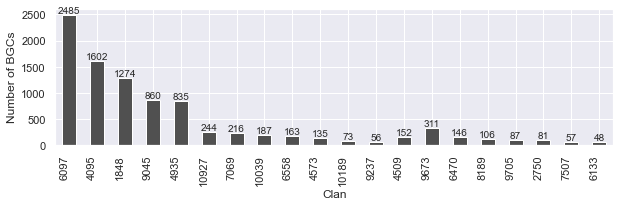

In [33]:
sns.set_style({'font.family': 'Arial'})
sns.set(style="darkgrid")


my_colors=["#505050","#505050"]

ax = m[["Clan", "Nr_BGCs_per_Clan"]].plot(kind='bar', x="Clan" ,figsize=(10,2.5), 
                                          stacked=True, legend=False, color=my_colors)#, yerr="std")#, error_kw=dict(ecolor='black',elinewidth=0.5, barsabove=True))

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(),y),ha='center', va='bottom', fontsize=10) # set the alignment of the text

#ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(),  horizontalalignment='right')
ax.set(ylabel='Number of BGCs')
    
fig = ax.get_figure()

fig.savefig("BGC_count_clans.svg", dpi=300, bbox_inches='tight')

sns.set_style({'font.family': 'Arial'})
sns.set(style="darkgrid")

fig = plt.figure(figsize=(10,2))
width = 0.4

ax = fig.add_subplot(111) # Create matplotlib axes
ax = m[["Clan","%carotenoid","%flexirubin"]].plot(kind='bar', x="Clan",stacked=True, ax=ax, width=width, position=1, )

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
ax.set_ylabel("Number of BGCs")


plt.show()
plt.close('all')
fig = ax.get_figure()

fig.savefig("carotenoids.svg", dpi=300, bbox_inches='tight')

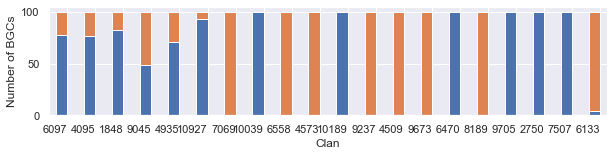

In [34]:
sns.set_style({'font.family': 'Arial'})
sns.set(style="darkgrid")

fig = plt.figure(figsize=(10,2))
width = 0.4

ax = fig.add_subplot(111) # Create matplotlib axes
ax = m[["Clan","%_Flavo","%_Week"]].plot(kind='bar', x="Clan",stacked=True, ax=ax, width=width, position=1, legend=False,)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
ax.set_ylabel("Number of BGCs")


plt.show()
plt.close('all')
fig = ax.get_figure()

fig.savefig("family.svg", dpi=300, bbox_inches='tight')

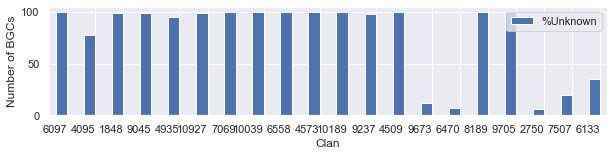

In [35]:

sns.set(style="darkgrid")

fig = plt.figure(figsize=(10,2))
width = 0.4
ax = fig.add_subplot(111) # Create matplotlib axes
m[["Clan","%Unknown"]].plot(kind='bar', x="Clan",stacked=True, ax=ax, width=width, position=1)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
ax.set_ylabel("Number of BGCs")


plt.show()
plt.close('all')
fig = ax.get_figure()

fig.savefig("Novelty.svg", dpi=300, bbox_inches='tight')

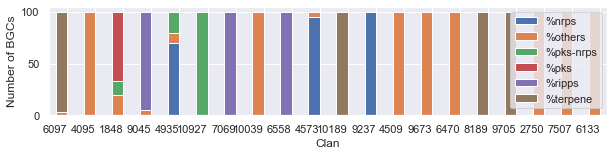

In [36]:
fig = plt.figure(figsize=(10,2))
width = 0.4
ax = fig.add_subplot(111) # Create matplotlib axes
m[["Clan","%nrps","%others","%pks-nrps","%pks","%ripps","%terpene"]].plot(kind='bar', x="Clan",stacked=True, ax=ax, width=width, position=1)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
ax.set_ylabel("Number of BGCs")


plt.show()
plt.close('all')
fig = ax.get_figure()

fig.savefig("types2.svg", dpi=300, bbox_inches='tight')

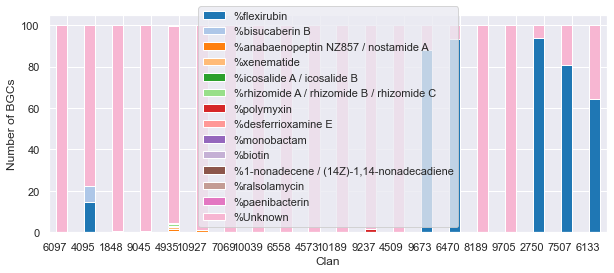

In [37]:
from matplotlib import cm
sns.set_palette('tab20')

fig = plt.figure(figsize=(10,4))
width = 0.4
ax = fig.add_subplot(111) # Create matplotlib axes



m[["Clan","%flexirubin","%bisucaberin B","%anabaenopeptin NZ857 / nostamide A","%xenematide","%icosalide A / icosalide B","%rhizomide A / rhizomide B / rhizomide C",
"%polymyxin","%desferrioxamine E","%monobactam","%biotin","%1-nonadecene / (14Z)-1,14-nonadecadiene",
"%ralsolamycin","%paenibacterin","%Unknown"]].plot(kind='bar', x="Clan",stacked=True, ax=ax, width=width, position=1)#, legend=False #'%Other compounds'

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
ax.set_ylabel("Number of BGCs")


plt.show()
plt.close('all')
fig = ax.get_figure()

fig.savefig("knowns.svg", dpi=300, bbox_inches='tight')

In [38]:
m[["Clan","%flexirubin","%bisucaberin B","%anabaenopeptin NZ857 / nostamide A","%xenematide","%icosalide A / icosalide B","%rhizomide A / rhizomide B / rhizomide C",
"%polymyxin","%desferrioxamine E","%monobactam","%biotin","%1-nonadecene / (14Z)-1,14-nonadecadiene",
"%ralsolamycin","%paenibacterin","%Unknown"]]

,Clan,%flexirubin,%bisucaberin B,%anabaenopeptin NZ857 / nostamide A,%xenematide,%icosalide A / icosalide B,%rhizomide A / rhizomide B / rhizomide C,%polymyxin,%desferrioxamine E,%monobactam,%biotin,"%1-nonadecene / (14Z)-1,14-nonadecadiene",%ralsolamycin,%paenibacterin,%Unknown
0,6097,0.160966,0.040241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,99.798793
1,4095,14.731586,7.490637,0.000000,0.000000,0.000000,0.062422,0.000000,0.124844,0.000000,0.062422,0.00000,0.00000,0.00000,77.528090
2,1848,0.549451,0.078493,0.235479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,99.136578
3,9045,0.348837,0.348837,0.000000,0.000000,0.000000,0.116279,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,99.186047
4,4935,0.119760,0.598802,0.958084,0.838323,0.718563,0.718563,0.119760,0.000000,0.239521,0.000000,0.11976,0.11976,0.11976,94.730539
5,10927,0.000000,0.000000,1.229508,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,98.770492
6,7069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,100.000000
7,10039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,100.000000
8,6558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,100.000000
9,4573,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,100.000000


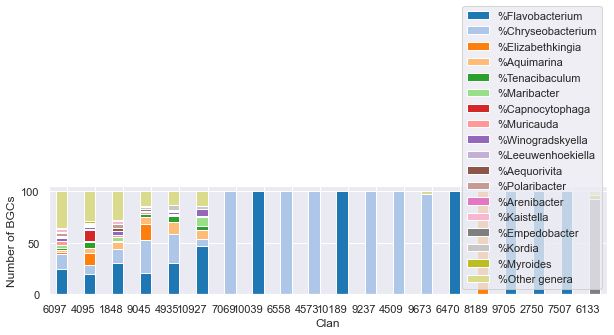

In [39]:
sns.set_palette("tab20")

fig = plt.figure(figsize=(10,2))
width = 0.4
ax = fig.add_subplot(111) # Create matplotlib axes
m[["Clan",'%Flavobacterium', '%Chryseobacterium', '%Elizabethkingia', '%Aquimarina', '%Tenacibaculum', '%Maribacter', '%Capnocytophaga',
   '%Muricauda', '%Winogradskyella', '%Leeuwenhoekiella', '%Aequorivita', '%Polaribacter', '%Arenibacter', '%Kaistella', '%Empedobacter',
   '%Kordia', '%Myroides', '%Other genera'   ]].plot(kind='bar', x="Clan",stacked=True, #color = cmap,
                                                                   ax=ax, width=width, position=1, legend=True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
ax.set_ylabel("Number of BGCs")


plt.show()
plt.close('all')
fig = ax.get_figure()

fig.savefig("genus2.svg", dpi=300, bbox_inches='tight')

sns.set_style({'font.family': 'Arial'})
sns.set(style="darkgrid")
sns.set_context("paper", font_scale=1.5) 

my_colors=["#3576a2","#e1812c"] #.drop(columns="std")

#ax = merge2.plot(kind='bar', x="Genus" ,figsize=(20,3), stacked=True, legend=False, color=my_colors, yerr="std")#, yerr="std")#, error_kw=dict(ecolor='black',elinewidth=0.5, barsabove=True))
#plt.rcParams['errorbar.capsize']=4
ax = merge2.plot(kind='bar', x="Genus" , y=["Flavobacteriaceae", "Weeksellaceae"],figsize=(20,3), stacked=True, legend=False, color=my_colors)#,yerr="std",  error_kw=dict(ecolor='black',elinewidth=0.5, barsabove=True))
ax.errorbar(x="Genus", y="Flavobacteriaceae",yerr="std")

ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set(ylabel='Scaffold (bp)')
#plt.errorbar("Genus", "Total", "std", ls='none', capsize=2, color="dimgrey")

#ax.errorbar(x=merge["Genus"], y=merge[["Flavobacteriaceae", "Weeksellaceae"]],xerr = dataset_reduced5["std"], color = "black", alpha = 0.4, capsize = 4)
import matplotlib.lines as mlines
#black_line=mlines.Line2D([], [], color='dimgrey', #marker='',
#                          markersize=7, label='Standard deviation')

fig = ax.get_figure()
fig.savefig("Genome_size.pdf", dpi=300, bbox_inches='tight')

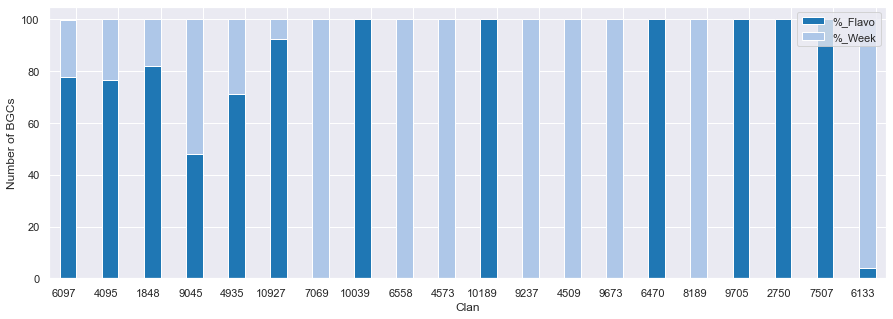

In [40]:
fig = plt.figure(figsize=(15,5))
width = 0.4
ax = fig.add_subplot(111) # Create matplotlib axes
m[["Clan","%_Flavo","%_Week"]].plot(kind='bar', x="Clan",stacked=True, ax=ax, width=width, position=1)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
ax.set_ylabel("Number of BGCs")


plt.show()
plt.close('all')

from matplotlib import cm

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

sns.set_style({'font.family': 'Arial'})
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.5) 

cmap = cm.get_cmap('tab20b_r') 

fig = plt.figure(figsize=(30,10))
width = 0.4
ax = fig.add_subplot(111) # Create matplotlib axes
m[["Clan",'carotenoid', 'flexirubin', 'putrebactin / avaroferrin', 'bisucaberin B', 'colanic acid', 'bacillomycin D', 'polysaccharide B', 
   'pinensins', 'ET-743', 'zwittermicin A', 'eicosapentaenoic acid-like compound', 'bacillaene', 'anabaenopeptin NZ857 / nostamide A', 
   'berninamycin A', 'desferrioxamine E', 'phormidolide', 'monobactam', 'WLIP', 'occidiofungin A', 
   'N-myristoyl-D-asparagine / cis-7-tetradecenoyl-D-asparagine / (R)-N1-((S)-5-oxohexan-2-yl)-2-tetradecanamidosuccinamide',  
   'Other compounds']].plot(kind='bar', x="Clan",cmap=cmap,
                            stacked=True, ax=ax, width=width, position=1)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
ax.set_ylabel("Number of BGCs")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc=(1.01,0),title="BGCs types")
#leg._legend_box.align = "left"


plt.tight_layout()
plt.show()
plt.close('all')
#ax.figure.savefig("BGCs_types.svg", dpi=300)

from matplotlib import cm

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

sns.set_style({'font.family': 'Arial'})
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.5) 

cmap = cm.get_cmap('tab20b_r') 

fig = plt.figure(figsize=(30,10))
width = 0.4
ax = fig.add_subplot(111) # Create matplotlib axes
m[["Clan",'%carotenoid', "%flexirubin'", '%putrebactin / avaroferrin', '%bisucaberin B', '%colanic acid', '%bacillomycin D', '%polysaccharide B', '%pinensins', '%ET-743', '%zwittermicin A', '%eicosapentaenoic acid-like compound', '%bacillaene', '%anabaenopeptin NZ857 / nostamide A', '%berninamycin A', '%desferrioxamine E', '%phormidolide', '%monobactam', '%WLIP', '%occidiofungin A', '%N-myristoyl', '%Other compounds']].plot(kind='bar', x="Clan",cmap=cmap,
                            stacked=True, ax=ax, width=width, position=1)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
ax.set_ylabel("Number of BGCs")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc=(1.01,0),title="BGCs types")
#leg._legend_box.align = "left"


plt.tight_layout()
plt.show()
plt.close('all')
#ax.figure.savefig("BGCs_types.svg", dpi=300)




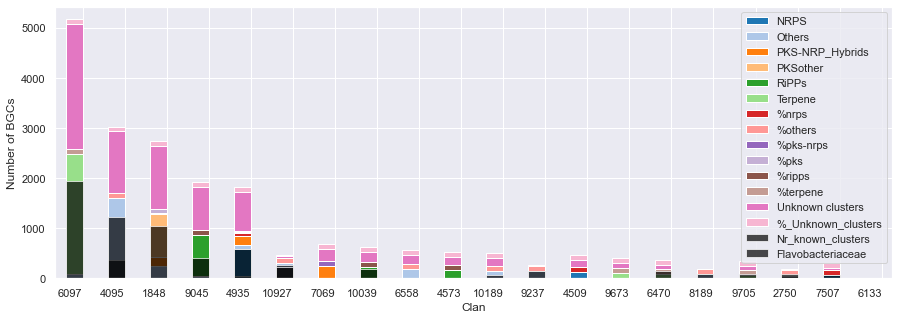

In [41]:
#https://stackoverflow.com/questions/24183101/pandas-bar-plot-with-two-bars-and-two-y-axis
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.4
df_figure1.plot(kind="bar", x="Clan", stacked=True, ax=ax, width=width, position=1) #color = colors_list
df_figure.plot(kind="bar", x="Clan", y="Nr_known_clusters", ax=ax, width=width, position=1,  alpha=0.7, color="black")
m.plot(kind="bar", x="Clan", y="Flavobacteriaceae", ax=ax, width=width, position=1,  alpha=0.7, color="black")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
ax.set_ylabel("Number of BGCs")


plt.show()
plt.close('all')

#for percentages: https://preinventedwheel.com/easy-matplotlib-bar-chart/


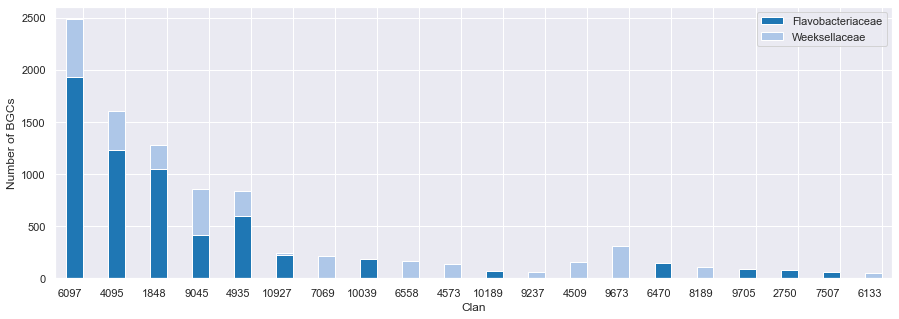

In [42]:


#https://stackoverflow.com/questions/24183101/pandas-bar-plot-with-two-bars-and-two-y-axis
fig = plt.figure(figsize=(15,5))
width = 0.4
ax = fig.add_subplot(111) # Create matplotlib axes
m[["Clan","Flavobacteriaceae","Weeksellaceae"]].plot(kind='bar', x="Clan",stacked=True, ax=ax, width=width, position=1)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
ax.set_ylabel("Number of BGCs")


plt.show()
plt.close('all')

#for percentages: https://preinventedwheel.com/easy-matplotlib-bar-chart/

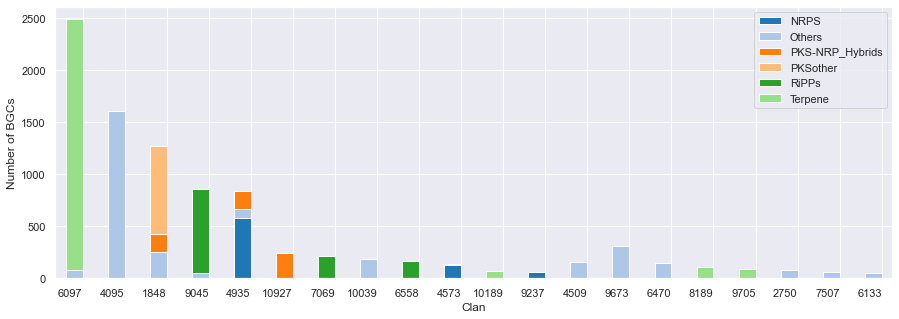

In [43]:
#https://stackoverflow.com/questions/24183101/pandas-bar-plot-with-two-bars-and-two-y-axis
fig = plt.figure(figsize=(15,5))
width = 0.4
ax = fig.add_subplot(111) # Create matplotlib axes
m[["Clan","NRPS","Others","PKS-NRP_Hybrids","PKSother","RiPPs","Terpene"]].plot(kind='bar', x="Clan",stacked=True, ax=ax, width=width, position=1)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
ax.set_ylabel("Number of BGCs")


plt.show()
plt.close('all')

#for percentages: https://preinventedwheel.com/easy-matplotlib-bar-chart/

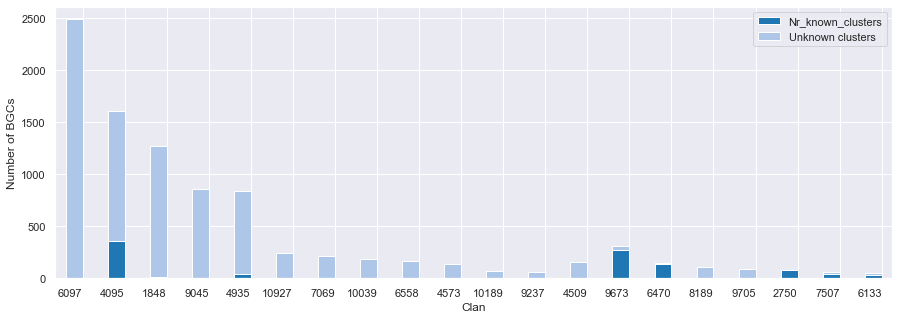

In [44]:

fig = plt.figure(figsize=(15,5))
width = 0.4
ax = fig.add_subplot(111) # Create matplotlib axes
m[["Clan","Nr_known_clusters","Unknown clusters"]].plot(kind='bar', x="Clan",stacked=True, ax=ax, width=width, position=1)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
ax.set_ylabel("Number of BGCs")


plt.show()
plt.close('all')

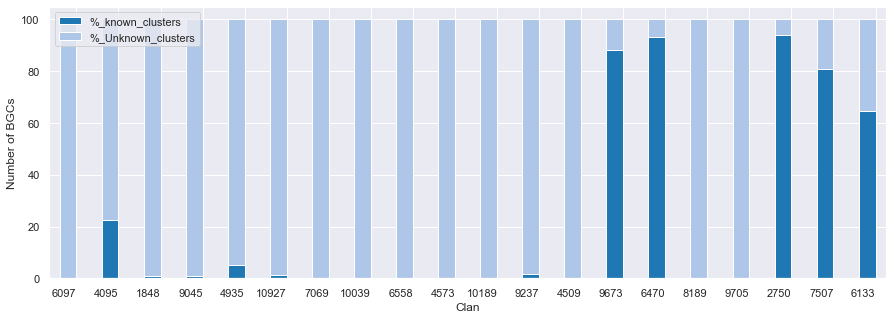

In [45]:
fig = plt.figure(figsize=(15,5))
width = 0.4
ax = fig.add_subplot(111) # Create matplotlib axes
m[["Clan","%_known_clusters","%_Unknown_clusters"]].plot(kind='bar', x="Clan",stacked=True, ax=ax, width=width, position=1)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
ax.set_ylabel("Number of BGCs")


plt.show()
plt.close('all')

In [46]:
bigscape_extended.head()

,Genome,BGC_full,Class,BiG-SCAPE class,Product Prediction,Clan,Family_bgc,Pfam_vector,Pfam_vector_length,Pfam_descriptor,Region_Type,antiSMASH_classif,new_classif,From,To,Size(bp),Most_similar_known_ cluster,Most_similar_classif,Similarity,BGC_name,Assembly accession,Genus,Family_tax,Origin,MAG,Completeness,Contamination,Strain_heterogeneity,Quality_score,Known_cluster
0,GCA_001975985.1,GCA_001975985.1_contig06.region001,NRPS,NRPS,NRPS,4935,1639,['PF00378.20 PF04023.14 PF02742.15 PF01325.19 ...,27,AMP-binding;AMP-binding_C;PP-binding;Condensation,Region&nbsp6.1,NRPS,NRPS,27019.0,76588.0,49569.0,monobactam,NRP,100.0,GCA_001975985.1_contig06.region001,GCA_001975985.1,Flavobacterium,Flavobacteriaceae,Non_marine,False,99.65,0.05,0.00,99.40,True
1,GCA_000154725.1,GCA_000154725.1_contig1.region002,NRPS,NRPS,NRPS-like,4935,1850,['PF00082.22 PF04542.14 PF14559.6 PF05147.13 P...,13,Coa1;T2SSE;T2SSF;T2SSF;DDE_Tnp_1_3;DUF1015;Pep...,Region&nbsp2,NRPS-like,NRPS,1061786.0,1102756.0,40970.0,NaN,NaN,0.0,GCA_000154725.1_contig1.region002,GCA_000154725.1,Kordia,Flavobacteriaceae,Unclassified,False,99.48,0.61,0.00,96.43,False
2,GCA_000154725.1,GCA_000154725.1_contig1.region005,NRPS,NRPS,NRPS,4935,1853,['PF00082.22 PF04542.14 PF14559.6 PF05147.13 P...,13,Coa1;T2SSE;T2SSF;T2SSF;DDE_Tnp_1_3;DUF1015;Pep...,Region&nbsp5,NRPS,NRPS,2472063.0,2578185.0,106122.0,NaN,NaN,0.0,GCA_000154725.1_contig1.region005,GCA_000154725.1,Kordia,Flavobacteriaceae,Unclassified,False,99.48,0.61,0.00,96.43,False
3,GCA_000171875.1,GCA_000171875.1_contig5.region002,NRPS,PKS-NRP_Hybrids,T1PKS.NRPS,4935,1858,['PF00456.21 PF02779.24 PF02780.20 PF13568.6 P...,21,Sigma70_r4_2;TRAM;tRNA_U5-meth_tr;DinB_2;Cupin...,Region&nbsp5.2,"NRPS,T1PKS",NRPS_PKS_hybrid,267991.0,318495.0,50504.0,NaN,NaN,0.0,GCA_000171875.1_contig5.region002,GCA_000171875.1,Winogradskyella,Flavobacteriaceae,Unclassified,False,98.84,1.76,88.89,90.04,False
4,GCA_000218485.2,GCA_000218485.2_contig148.region001,NRPS,NRPS,NRPS,4935,1897,['PF00282.19 PF13434.6 PF07690.16 PF13523.6 PF...,25,PAAR_motif;Phage_GPD;Rhomboid;TssD;TssD;DUF302...,Region&nbsp115.1,NRPS,NRPS,19675.0,81164.0,61489.0,N-myristoyl-D-asparagine / cis-7-tetradecenoyl...,NRP + Polyketide:Modular type I + Polyketide:T...,17.0,GCA_000218485.2_contig148.region001,GCA_000218485.2,Aquimarina,Flavobacteriaceae,Unclassified,False,99.62,0.57,0.00,96.77,False


In [47]:
bigscape_extended[bigscape_extended["Clan"]==6097]["BiG-SCAPE class"].value_counts().sum()

2485

In [48]:
bigscape_extended[bigscape_extended["Clan"]==6097]["BiG-SCAPE class"].value_counts()

Terpene    2405
Others       80
Name: BiG-SCAPE class, dtype: int64

In [49]:
bigscape_extended[bigscape_extended["Clan"]==6097]["Most_similar_known_ cluster"].value_counts().sum()

1694

In [50]:
bigscape_extended[bigscape_extended["Clan"]==6097]["Most_similar_known_ cluster"].value_counts()

carotenoid                                                           1632
bacillomycin D                                                         41
berninamycin A                                                          9
flexirubin                                                              4
burkholderic acid                                                       2
TP-1161                                                                 2
eicosapentaenoic acid-like compound                                     1
malleobactin A / malleobactin B / malleobactin C / malleobactin D       1
bisucaberin B                                                           1
putrebactin / avaroferrin                                               1
Name: Most_similar_known_ cluster, dtype: int64

In [51]:
bigscape[bigscape["Clan"]==4095]["BiG-SCAPE class"].value_counts()

Others    1602
Name: BiG-SCAPE class, dtype: int64

In [52]:
bigscape_extended[bigscape_extended["Clan"]==4095]["Most_similar_known_ cluster"].value_counts().sum()

919

In [53]:
bigscape[bigscape["Clan"]==1848]["BiG-SCAPE class"].value_counts()

PKSother           850
Others             252
PKS-NRP_Hybrids    172
Name: BiG-SCAPE class, dtype: int64

In [54]:
bigscape_extended[bigscape_extended["Clan"]==1848]["Most_similar_known_ cluster"].value_counts().sum()

138

In [55]:
bigscape_extended[bigscape_extended["Clan"]==1848]["Most_similar_known_ cluster"].value_counts()

ET-743                                                                                                                     27
flexirubin                                                                                                                 12
bacillaene                                                                                                                 12
phormidolide                                                                                                                9
carotenoid                                                                                                                  9
eicosapentaenoic acid-like compound                                                                                         8
zwittermicin A                                                                                                              7
polysaccharide B                                                                                                      

In [56]:
bigscape[bigscape["Clan"]==9045]["BiG-SCAPE class"].value_counts()

RiPPs     812
Others     48
Name: BiG-SCAPE class, dtype: int64

In [57]:
bigscape_extended[bigscape_extended["Clan"]==9045]["Most_similar_known_ cluster"].value_counts().sum()

40

In [58]:
bigscape_extended[bigscape_extended["Clan"]==9045]["Most_similar_known_ cluster"].value_counts()

pinensins                                                                                                                  19
flexirubin                                                                                                                  5
N-myristoyl-D-asparagine / cis-7-tetradecenoyl-D-asparagine / (R)-N1-((S)-5-oxohexan-2-yl)-2-tetradecanamidosuccinamide     3
bisucaberin B                                                                                                               3
bacillomycin D                                                                                                              3
ET-743                                                                                                                      2
carotenoid                                                                                                                  1
O&amp;K-antigen                                                                                                       

In [59]:
bigscape[bigscape["Clan"]==4935]["BiG-SCAPE class"].value_counts()

NRPS               581
PKS-NRP_Hybrids    172
Others              82
Name: BiG-SCAPE class, dtype: int64

In [60]:
bigscape_extended[bigscape_extended["Clan"]==9673]["Most_similar_known_ cluster"].value_counts()

flexirubin    311
Name: Most_similar_known_ cluster, dtype: int64

In [61]:
bigscape["BiG-SCAPE class"].value_counts()

Others             3346
Terpene            3124
RiPPs              1325
PKSother            938
NRPS                853
PKS-NRP_Hybrids     648
Name: BiG-SCAPE class, dtype: int64

In [62]:
#bigscape["Clan"].value_counts()

### Numbers

In [63]:
bigscape_extended["BiG-SCAPE class"].value_counts()

Others             3346
Terpene            3124
RiPPs              1325
PKSother            938
NRPS                853
PKS-NRP_Hybrids     648
Name: BiG-SCAPE class, dtype: int64

In [64]:
bigscape_extended.head()

,Genome,BGC_full,Class,BiG-SCAPE class,Product Prediction,Clan,Family_bgc,Pfam_vector,Pfam_vector_length,Pfam_descriptor,Region_Type,antiSMASH_classif,new_classif,From,To,Size(bp),Most_similar_known_ cluster,Most_similar_classif,Similarity,BGC_name,Assembly accession,Genus,Family_tax,Origin,MAG,Completeness,Contamination,Strain_heterogeneity,Quality_score,Known_cluster
0,GCA_001975985.1,GCA_001975985.1_contig06.region001,NRPS,NRPS,NRPS,4935,1639,['PF00378.20 PF04023.14 PF02742.15 PF01325.19 ...,27,AMP-binding;AMP-binding_C;PP-binding;Condensation,Region&nbsp6.1,NRPS,NRPS,27019.0,76588.0,49569.0,monobactam,NRP,100.0,GCA_001975985.1_contig06.region001,GCA_001975985.1,Flavobacterium,Flavobacteriaceae,Non_marine,False,99.65,0.05,0.00,99.40,True
1,GCA_000154725.1,GCA_000154725.1_contig1.region002,NRPS,NRPS,NRPS-like,4935,1850,['PF00082.22 PF04542.14 PF14559.6 PF05147.13 P...,13,Coa1;T2SSE;T2SSF;T2SSF;DDE_Tnp_1_3;DUF1015;Pep...,Region&nbsp2,NRPS-like,NRPS,1061786.0,1102756.0,40970.0,NaN,NaN,0.0,GCA_000154725.1_contig1.region002,GCA_000154725.1,Kordia,Flavobacteriaceae,Unclassified,False,99.48,0.61,0.00,96.43,False
2,GCA_000154725.1,GCA_000154725.1_contig1.region005,NRPS,NRPS,NRPS,4935,1853,['PF00082.22 PF04542.14 PF14559.6 PF05147.13 P...,13,Coa1;T2SSE;T2SSF;T2SSF;DDE_Tnp_1_3;DUF1015;Pep...,Region&nbsp5,NRPS,NRPS,2472063.0,2578185.0,106122.0,NaN,NaN,0.0,GCA_000154725.1_contig1.region005,GCA_000154725.1,Kordia,Flavobacteriaceae,Unclassified,False,99.48,0.61,0.00,96.43,False
3,GCA_000171875.1,GCA_000171875.1_contig5.region002,NRPS,PKS-NRP_Hybrids,T1PKS.NRPS,4935,1858,['PF00456.21 PF02779.24 PF02780.20 PF13568.6 P...,21,Sigma70_r4_2;TRAM;tRNA_U5-meth_tr;DinB_2;Cupin...,Region&nbsp5.2,"NRPS,T1PKS",NRPS_PKS_hybrid,267991.0,318495.0,50504.0,NaN,NaN,0.0,GCA_000171875.1_contig5.region002,GCA_000171875.1,Winogradskyella,Flavobacteriaceae,Unclassified,False,98.84,1.76,88.89,90.04,False
4,GCA_000218485.2,GCA_000218485.2_contig148.region001,NRPS,NRPS,NRPS,4935,1897,['PF00282.19 PF13434.6 PF07690.16 PF13523.6 PF...,25,PAAR_motif;Phage_GPD;Rhomboid;TssD;TssD;DUF302...,Region&nbsp115.1,NRPS,NRPS,19675.0,81164.0,61489.0,N-myristoyl-D-asparagine / cis-7-tetradecenoyl...,NRP + Polyketide:Modular type I + Polyketide:T...,17.0,GCA_000218485.2_contig148.region001,GCA_000218485.2,Aquimarina,Flavobacteriaceae,Unclassified,False,99.62,0.57,0.00,96.77,False


In [65]:
terpenes = bigscape_extended[bigscape_extended["new_classif"] == "terpene"]
terpenes["MAG"].value_counts()/len(terpenes)*100

False    73.65557
True     26.28041
Name: MAG, dtype: float64

In [97]:
terpenes = bigscape_extended[(bigscape_extended["BiG-SCAPE class"] == "Terpene")]
terpenes=terpenes[["Family_bgc", "MAG", "Clan"]]
terpenes.groupby(["Family_bgc", "MAG"]).count().sort_values(by="Clan", ascending=False)


,,Clan
Family_bgc,MAG,
10770,False,77
6128,False,76
6097,False,50
2897,False,48
6051,False,43
3068,False,40
10186,False,39
11092,False,37
2543,False,36


In [67]:
bigscape_extended["MAG"].value_counts()/len(bigscape_extended)*100

False    82.821966
True     17.158491
Name: MAG, dtype: float64

In [68]:
bigscape_extended["MAG"].value_counts()

False    8476
True     1756
Name: MAG, dtype: int64

In [69]:
bigscape_extended["Family_tax"].value_counts()/len(bigscape_extended)*100

Flavobacteriaceae    66.679695
Weeksellaceae        33.300762
Name: Family_tax, dtype: float64

In [70]:
bigscape_extended["Family_tax"].value_counts()

Flavobacteriaceae    6824
Weeksellaceae        3408
Name: Family_tax, dtype: int64

In [71]:
bigscape_extended["new_classif"].value_counts()/len(bigscape_extended)*100

terpene            30.525699
Others             18.497166
RiPPs              12.937268
PKSIII             10.738714
NRPS                8.334962
NRPS_PKS_hybrid     6.683604
Siderophore         6.488177
PKS_other           3.156146
NRPS_other          2.130154
transAT_PSK         0.498339
Name: new_classif, dtype: float64

In [72]:
bigscape_extended["new_classif"].value_counts()

terpene            3124
Others             1893
RiPPs              1324
PKSIII             1099
NRPS                853
NRPS_PKS_hybrid     684
Siderophore         664
PKS_other           323
NRPS_other          218
transAT_PSK          51
Name: new_classif, dtype: int64

In [73]:
bigscape_extended.groupby("new_classif")["Genome"].count()

new_classif
NRPS                853
NRPS_PKS_hybrid     684
NRPS_other          218
Others             1893
PKSIII             1099
PKS_other           323
RiPPs              1324
Siderophore         664
terpene            3124
transAT_PSK          51
Name: Genome, dtype: int64

                    % MAGs
new_classif               
Siderophore       3.915663
transAT_PSK       3.921569
NRPS_other        5.504587
NRPS_PKS_hybrid   6.578947
PKS_other         7.739938
NRPS              9.730363
RiPPs            12.009063
Others           17.432647
PKSIII           23.020928
terpene          26.280410


Text(0.5, 0, '% of BGCs with MAG origin')

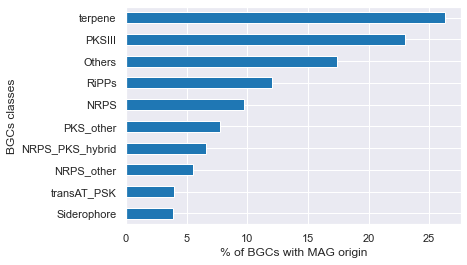

In [74]:
df = bigscape_extended.groupby("new_classif")["MAG"].value_counts()/bigscape_extended.groupby("new_classif")["Genome"].count()*100
df = df.to_frame().reset_index()
df = df[df["MAG"]==True].drop(columns="MAG").rename(columns={0:"% MAGs"}).sort_values(by="% MAGs", ascending=True).set_index("new_classif")
print(df)
ax = df.plot(kind="barh", legend=False)
ax.set_ylabel("BGCs classes")
ax.set_xlabel("% of BGCs with MAG origin")



In [75]:
bigscape_extended[bigscape_extended["new_classif"] == "terpene"]["MAG"]
terpenes["MAG"].value_counts()/len(terpenes)*100

False    73.65557
True     26.28041
Name: MAG, dtype: float64

# Analysis

In [76]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

data = pd.read_csv("../../3_Annotation/antismash_results/Clans_and_families_extended.csv")

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10234 entries, 0 to 10233
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Genome                       10234 non-null  object 
 1   BGC_full                     10234 non-null  object 
 2   Class                        10234 non-null  object 
 3   BiG-SCAPE class              10234 non-null  object 
 4   Product Prediction           10234 non-null  object 
 5   Clan                         10234 non-null  int64  
 6   Family_bgc                   10234 non-null  int64  
 7   Pfam_vector                  10234 non-null  object 
 8   Pfam_vector_length           10234 non-null  int64  
 9   Pfam_descriptor              10234 non-null  object 
 10  Region_Type                  10233 non-null  object 
 11  antiSMASH_classif            10233 non-null  object 
 12  new_classif                  10233 non-null  object 
 13  From            

In [78]:
data.groupby("BiG-SCAPE class")[["Clan", "Family_tax"]].describe()

Clan                                                    \
                  count         mean          std     min     25%     50%   
BiG-SCAPE class                                                             
NRPS              853.0  5292.849941  1369.214314  3528.0  4935.0  4935.0   
Others           3346.0  5314.133293  2466.669487  1848.0  4095.0  4095.0   
PKS-NRP_Hybrids   648.0  6544.952160  3822.579999  1848.0  1848.0  4935.0   
PKSother          938.0  2401.175906  1814.011120  1848.0  1848.0  1848.0   
RiPPs            1325.0  8160.670943  1324.299390  2447.0  7069.0  9045.0   
Terpene          3124.0  6350.106914  1289.078091  2581.0  6097.0  6097.0   

                                   
                     75%      max  
BiG-SCAPE class                    
NRPS              4935.0  10668.0  
Others            6470.0  11009.0  
PKS-NRP_Hybrids  10927.0  10927.0  
PKSother          1848.0  10091.0  
RiPPs             9045.0  10204.0  
Terpene           6097.0  10920.0

In [79]:
data.groupby("Clan").nunique().T

Clan,1848,1982,2447,2581,2584,2710,2750,2810,2975,3068,3103,3167,3188,3194,3528,3570,3897,3966,3967,4028,4069,4095,4148,4158,4294,4349,4477,4478,4509,4560,4568,4573,4598,4601,4638,4639,4733,4935,4990,5143,5315,5365,5381,5546,5609,5710,5727,5878,6005,6097,6133,6134,6346,6397,6470,6558,6603,6622,6637,6859,6910,6911,7069,7071,7218,7507,7508,7516,7763,7770,8095,8122,8148,8189,8424,8486,8573,8830,9045,9077,9211,9237,9673,9705,9827,9838,9847,9851,9888,9941,10039,10091,10101,10134,10189,10204,10206,10668,10844,10920,10927,11009
Genome,1079,13,4,7,12,9,81,5,2,40,8,6,6,19,34,4,4,29,22,28,7,1217,15,7,44,12,10,9,152,22,25,135,23,5,4,2,5,403,9,1,6,10,4,7,12,12,1,7,5,1862,41,4,7,3,142,163,18,2,32,46,9,32,214,46,5,52,3,8,9,1,3,33,8,106,7,28,11,30,629,12,30,56,293,86,4,31,29,17,9,6,187,15,1,7,73,5,5,12,16,13,194,32
BGC_full,1274,13,5,7,12,9,81,5,2,40,8,6,6,19,34,4,4,29,22,28,7,1602,15,7,44,12,10,9,152,22,25,135,23,5,4,2,5,835,9,1,6,10,4,7,12,12,1,7,5,2485,48,4,7,3,146,163,18,2,32,46,9,32,216,46,5,57,3,8,9,1,3,33,8,106,7,28,11,30,860,12,30,56,311,87,4,31,29,17,9,6,187,15,1,7,73,5,5,12,16,13,216,32
Class,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1
BiG-SCAPE class,3,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Product Prediction,40,1,1,1,1,2,1,3,1,1,1,1,1,1,1,1,1,1,1,4,1,57,1,1,1,1,1,1,1,2,2,4,1,1,1,1,1,39,1,1,1,1,1,1,3,1,1,1,2,16,3,1,2,1,3,1,1,1,1,1,1,1,1,3,2,3,1,1,1,1,1,1,1,1,1,1,1,1,32,1,1,1,4,1,1,2,1,3,1,2,3,1,1,1,1,1,1,1,1,1,13,5
Family_bgc,347,1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,3,1,3,1,421,2,1,3,1,1,1,4,1,1,6,1,1,1,1,1,582,1,1,1,1,1,1,1,1,1,1,1,570,3,1,1,1,6,5,1,1,2,4,1,3,8,3,1,1,1,1,1,1,1,3,1,4,1,1,1,3,368,2,1,2,7,5,1,2,3,1,1,1,5,1,1,1,4,1,1,1,2,1,132,1
Pfam_vector,1008,5,4,5,10,9,37,5,2,38,6,6,5,16,25,4,4,23,17,28,7,958,11,6,38,12,9,9,112,18,22,106,22,5,4,2,5,369,7,1,5,10,4,6,11,10,1,7,5,1608,35,4,7,3,138,140,11,2,32,46,8,29,173,46,5,35,3,8,6,1,3,33,7,44,6,20,11,27,540,12,14,28,246,83,3,30,26,17,7,6,181,14,1,7,72,5,5,9,16,13,184,30
Pfam_vector_length,84,3,3,5,10,8,24,5,2,27,5,4,3,14,14,3,3,17,12,24,6,84,6,4,23,12,7,9,45,12,16,46,18,5,4,2,4,78,6,1,3,7,4,5,9,9,1,5,4,81,23,3,7,3,58,54,10,2,20,23,6,21,54,25,5,22,3,7,6,1,3,20,5,18,5,12,10,15,74,10,10,20,64,45,2,26,22,16,6,4,61,12,1,5,40,5,5,7,13,13,63,20
Pfam_descriptor,1019,5,4,7,12,9,36,5,2,40,7,6,4,18,24,4,4,23,17,28,7,972,15,6,40,11,9,9,118,19,21,105,23,5,4,2,5,371,9,1,6,10,4,7,12,12,1,6,5,1621,35,4,7,3,140,140,14,2,31,44,8,30,175,46,5,34,3,7,7,1,3,31,5,46,6,19,11,28,547,11,16,31,247,85,3,30,29,17,9,6,184,13,1,7,72,5,5,9,16,13,191,30
Region_Type,207,7,5,6,11,8,48,5,2,32,8,6,6,13,26,4,4,21,18,23,7,269,11,7,30,11,10,9,62,19,21,67,18,5,4,2,5,208,8,1,4,9,4,7,11,11,1,7,5,317,37,4,6,2,72,72,10,2,24,27,9,28,85,35,3,35,3,8,6,1,3,22,7,40,6,22,11,24,188,10,5,21,101,42,4,29,26,11,8,6,73,13,1,6,45,5,5,11,13,12,82,30


In [80]:
#remove genus with less than 10 genomes
data_reduced =data.groupby('Genus').filter(lambda x : len(x)>10) 
data_reduced.groupby("Genus").nunique().T

Genus,Aequorivita,Algibacter,Algorimicrobium,Altibacter,Apibacter,Aquimarina,Arenibacter,BACL21,CG2-30-34-30,Capnocytophaga,Cellulophaga,Chryseobacterium,Croceibacter,Croceitalea,Croceivirga,Dokdonia,Elizabethkingia,Empedobacter,Epilithonimonas,Eudoraea,Euzebyella,Flavobacterium,GCA-002723295,GCA-2733415,Gelidibacter,Gillisia,Gramella,HC6-5,Jejuia,Kaistella,Kordia,Lacinutrix,Leeuwenhoekiella,Lutibacter,MAG-120531,MAG-121220-bin8,MED-G11,MED-G14,MS024-2A,Maribacter,Maribacter_A,Mariniflexile,Marinirhabdus,Marixanthomonas,Mesonia,Muricauda,Muricauda_A,Muriicola,Myroides,Nonlabens,Olleya,Planobacterium,Polaribacter,Pricia,Pseudozobellia,Psychroflexus,Psychroserpens,RR4-38,Robiginitalea,SCGC-AAA160-P02,SHLJ01,SZUA-72,Salegentibacter,Salinimicrobium,Sinomicrobium,Tamlana_A,Tamlana_B,Tenacibaculum,UBA11891,UBA3478,UBA4166,UBA6231,UBA724,UBA7428,UBA7446,UBA7949,UBA8316,Uncl. Flavobacteriaceae,Uncl. Weeksellaceae,Winogradskyella,Xanthomarina,Zobellia,Zunongwangia
Genome,42,9,7,5,21,39,22,14,8,64,21,294,6,4,8,11,193,41,31,4,9,588,5,3,12,11,16,3,9,48,8,9,38,16,26,7,7,12,18,45,5,5,14,9,19,53,5,8,39,28,13,11,57,3,2,17,11,6,4,4,11,2,19,6,3,6,2,68,8,5,4,13,9,6,12,6,12,17,3,55,11,6,12
BGC_full,124,16,14,18,23,371,103,15,20,181,49,2250,24,13,29,44,565,93,62,19,48,2489,11,15,29,39,46,11,21,91,75,15,137,19,41,12,14,19,32,171,11,8,45,19,66,164,11,28,69,83,22,14,122,15,11,47,28,19,13,15,14,13,54,12,25,16,7,232,13,12,13,18,17,11,20,18,21,48,12,137,20,33,30
Class,3,4,3,3,2,6,5,1,4,1,4,6,3,4,6,6,4,4,3,5,5,6,2,6,5,5,4,3,5,4,6,4,6,3,2,2,1,2,2,6,3,4,3,3,3,6,4,5,6,5,4,2,4,5,4,4,5,4,4,4,2,5,4,2,4,2,5,6,1,2,3,3,1,1,1,4,2,6,4,6,2,5,3
BiG-SCAPE class,3,3,2,3,2,6,5,1,3,1,4,6,3,4,6,6,4,4,3,5,4,6,2,5,4,5,4,3,5,4,6,4,6,3,2,2,1,2,2,6,3,2,3,3,3,6,3,4,5,5,4,2,4,5,3,4,4,4,4,4,2,5,4,2,4,2,3,6,1,2,3,3,1,1,1,4,2,6,4,6,2,4,3
Product Prediction,7,3,4,4,3,31,6,1,4,2,7,47,3,4,8,10,6,8,6,7,6,51,2,9,5,7,5,6,7,7,12,5,9,3,2,2,1,2,2,12,3,2,6,3,7,14,3,5,10,7,5,2,7,8,5,7,6,4,4,7,2,7,5,2,8,3,3,15,1,2,4,4,1,1,1,6,2,11,4,9,3,7,3
Clan,6,5,3,3,2,9,9,1,4,2,4,35,3,4,6,6,10,7,4,5,5,32,2,6,5,7,5,5,5,4,6,4,11,3,4,2,1,2,2,8,4,4,4,3,3,8,5,5,10,7,4,2,4,5,4,4,5,5,4,4,2,5,5,2,5,2,5,7,1,2,3,3,3,1,3,4,2,6,4,6,3,5,3
Family_bgc,23,4,7,12,4,181,21,6,7,47,17,443,8,10,22,22,44,17,23,17,9,557,5,12,16,20,20,12,16,32,55,10,29,8,8,8,3,7,9,45,9,5,15,9,28,61,7,18,27,29,8,5,36,14,11,25,14,8,10,10,7,13,9,4,19,7,5,86,3,5,5,7,3,6,3,12,8,42,4,40,5,17,7
Pfam_vector,36,8,7,5,7,38,20,14,6,60,16,245,6,4,8,11,82,34,31,4,9,495,5,3,12,11,16,3,9,45,8,8,34,16,25,7,7,12,18,38,5,5,13,9,16,45,5,8,26,24,12,10,54,3,2,17,9,6,4,4,11,2,19,6,3,6,2,46,8,5,3,9,7,6,11,6,11,16,3,54,11,5,11
Pfam_vector_length,25,6,6,4,5,30,16,12,6,31,10,66,4,3,7,10,28,22,22,3,8,70,3,2,9,7,11,3,6,24,7,6,24,9,15,6,6,11,12,20,4,4,11,7,13,22,5,8,14,21,7,7,27,3,2,14,7,6,4,4,7,2,13,5,3,6,2,22,7,5,3,6,5,6,9,6,9,13,3,31,10,4,11
Pfam_descriptor,38,6,7,5,6,38,21,14,7,60,14,247,6,4,8,10,83,34,31,4,9,492,5,3,12,11,16,3,9,43,8,8,36,16,25,7,7,12,18,45,5,5,14,8,19,47,5,8,28,28,12,10,52,3,2,16,10,6,4,4,11,2,19,6,3,6,2,48,8,5,4,9,8,6,12,6,11,17,3,55,11,6,12


In [81]:
#between families, what is the percentage of equal BGCs?
data.groupby("Family_bgc")["Pfam_vector"].nunique()

Family_bgc
1500     18
1639      1
1815      1
1824     17
1838      1
         ..
11088     1
11092    39
11107     1
11112     1
11113     1
Name: Pfam_vector, Length: 2297, dtype: int64

In [82]:
#data.groupby("Pfam_vector")["Genome"].nunique().T.plot(kind="barh")

In [83]:
data["Pfam_vector"].nunique()

2136

In [84]:
data.groupby("BiG-SCAPE class").size()

BiG-SCAPE class
NRPS                853
Others             3346
PKS-NRP_Hybrids     648
PKSother            938
RiPPs              1325
Terpene            3124
dtype: int64

In [85]:
data[data["BiG-SCAPE class"]=="PKSother"]["Clan"].value_counts()

1848     850
9211      30
6603      18
10091     15
5710      12
4990       9
5381       4
Name: Clan, dtype: int64

In [86]:
data_reduced[data_reduced["BiG-SCAPE class"]=="PKSother"].groupby(["Family_bgc","Clan","Genus"]).count().head(10)#.sort_values(by="Family_bgc",ascending=False)

Genome  BGC_full  Class  BiG-SCAPE class  \
Family_bgc Clan Genus                                                      
1849       1848 Kordia               1         1      1                1   
1959       1848 Flavobacterium       9         9      9                9   
2010       1848 Nonlabens            2         2      2                2   
2035       1848 Dokdonia             1         1      1                1   
2037       1848 Aequorivita          2         2      2                2   
                Altibacter           1         1      1                1   
                Muricauda            1         1      1                1   
                Psychroflexus        6         6      6                6   
2044       1848 Flavobacterium       3         3      3                3   
                Kaistella            1         1      1                1   

                                Product Prediction  Pfam_vector  \
Family_bgc Clan Genus                                             
1849       1848 Kordia                           1            1   
1959       1848 Flavobacterium                   9            9   
2010       1848 Nonlabens                        2            2   
2035       1848 Dokdonia                         1            1   
2037       1848 Aequorivita                      2            2   
                Altibacter                       1            1   
                Muricauda                        1            1   
                Psychroflexus                    6            6   
2044       1848 Flavobacterium                   3            3   
                Kaistella                        1            1   

                                Pfam_vector_length  Pfam_descriptor  \
Family_bgc Clan Genus                                                 
1849       1848 Kordia                           1                1   
1959       1848 Flavobacterium                   9                9   
2010       1848 Nonlabens                        2                2   
2035       1848 Dokdonia                         1                1   
2037       1848 Aequorivita                      2                2   
                Altibacter                       1                1   
                Muricauda                        1                1   
                Psychroflexus                    6                6   
2044       1848 Flavobacterium                   3                3   
                Kaistella                        1                1   

                                Region_Type  antiSMASH_classif  new_classif  \
Family_bgc Clan Genus                                                         
1849       1848 Kordia                    1                  1            1   
1959       1848 Flavobacterium            9                  9            9   
2010       1848 Nonlabens                 2                  2            2   
2035       1848 Dokdonia                  1                  1            1   
2037       1848 Aequorivita               2                  2            2   
                Altibacter                1                  1            1   
                Muricauda                 1                  1            1   
                Psychroflexus             6                  6            6   
2044       1848 Flavobacterium            3                  3            3   
                Kaistella                 1                  1            1   

                                From  To  Size(bp)  \
Family_bgc Clan Genus                                
1849       1848 Kordia             1   1         1   
1959       1848 Flavobacterium     9   9         9   
2010       1848 Nonlabens          2   2         2   
2035       1848 Dokdonia           1   1         1   
2037       1848 Aequorivita        2   2         2   
                Altibacter         0   1         0   
                Muricauda          1   1         1   
                Psychrofle